# Analysis of Spread of PDAF Protest Sentiment on Twitter

## Executive Summary

## Introduction

## The Dataset

## Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import glob
import ast
import re

import networkx as nx
from itertools import combinations
from collections import Counter 
from datetime import datetime, timedelta, date

### Data Preparation

In [2]:
# # check data paths
# paths = glob.glob("data/*")
# paths_tweets_to_merge = [path for path in paths if "tweets" in path and "merged" not in path]
# paths_tweets_to_merge.remove("data/tweets_mpm_list_following.json")
# paths_tweets_to_merge

In [3]:
# # Merge tweets dataset

# hashtags = ["janetnapoles", "millionpeoplemarch", "pdafkalampag", "pdafscam",
#             "scrappork", "onepinoy", "porkbarrel",
#             "porkbarrelscam", "protestangbayan", "stoppork",
#             "tayoangboss", "yesconchitacan"]

# df_tweets_merged = pd.DataFrame()

# for path, hashtag in zip(paths_tweets_to_merge, hashtags):

#     df = pd.read_json(path)
#     # add a column for the #hashtag
#     df["hashtag"] = hashtag

#     # merge
#     df_tweets_merged = pd.concat([df_tweets_merged, df])

# # reset index
# df_tweets_merged = df_tweets_merged.reset_index(drop=True)

# # filter only those tweets in 2013
# # still get NaT values
# condition_1 = df_tweets_merged.date.isnull()
# # get time after June 2013
# condition_2 = df_tweets_merged.date > pd.Timestamp('2013-06-01 00:00:00')
# # get time before Jan 2014
# condition_3 = df_tweets_merged.date < pd.Timestamp('2014-01-01 00:00:00')

# # merge conditions
# merged_conditions = condition_1 | condition_2 & condition_3
# df_tweets_merged = df_tweets_merged[merged_conditions]
# df_tweets_merged = df_tweets_merged.sort_values(
#     by="date").reset_index(drop=True)

# # # save to json
# pd.DataFrame.to_json(
#     df_tweets_merged, "data/tweets_merged.json", orient="records")

In [4]:
## IMPLEMENT KEY DUPLICATE REMOVER DURING CLEANING?
## Dictionaries automatically remove duplicates

In [5]:
def read_dict_from_file(path):

    # open scraped file as string
    f = open(path).read()

    # convert scraped file from string to dictionary
    dic = ast.literal_eval(f)

    # return dictionary of file
    return dic

In [6]:
def clean_dict(dirty_dict, name_type="screen_name"):

    # define new dictionary
    new_dict = {}

    # get keys from input dirty dict
    keys = dirty_dict.keys()

    for key in keys:

        # format is [{"full_name" : "XX", "screen_name" : "YY"}]
        value = dirty_dict[key]
        
        # pattern for cleaning - just retain alphanumeric
        pattern = re.compile("[\w]+")

        # clean full_names and make lower_case
        # get followers full_name per user
        full_names = ["".join(re.findall(pattern, d[name_type])).lower() for d in value]
    
        # clean keys
        new_key = "".join(re.findall(pattern, key)).lower()
        
        # make key: value pair using full_name per user
        new_dict[new_key] = full_names

    # return new_dict
    return new_dict

# Analysis

## Preparing Follower and Following Data

In [7]:
# # load dirty followers dictionary
# path = "data/user_followers_final.json"
# dirty_followers = read_dict_from_file(path)

# # load dirty following dictionary
# path = "data/user_following.json"
# dirty_following = read_dict_from_file(path)

In [8]:
# # get clean followers, full_name
# clean_followers = clean_dict(dirty_followers, "screen_name")

# # get clean following, full_name
# clean_following = clean_dict(dirty_following, "screen_name")

In [9]:
# function to combine (get union) dictionaries
def union_dict(a, b):
    # a is the bigger dataset we will update with b
    for k, v in a.items():
        # if key is in a and b, then just append to current data in a
        if k in b.keys():
            # get union of unique items (remove redundancy)
            a[k] = list(set(a[k] + b[k]))

    # append keys in b that are not in a
    for k, v in b.items():
        if k not in a.keys():
            a[k] = v

    return a

In [10]:
# # Test
# a = {"a":[1, 2, 5], "b":[2, 3, 4]}
# b = {"a":[1, 2, 3, 4], "c":[8, 9]}
# union_dict(a, b)

In [11]:
# convert following to followers format
# e.g. {"user_A": ["followed_user_1", "followed_user_2"]
# turn to: {"followed_user_1" : ["user_A], "followed_user_2": ["user_A"]}
# So network direction goes from user (followed) to follower

def swap_key_val(old_dic):

    # get keys of dictionary to swap
    keys = old_dic.keys()

    # convert keys to vals and vals to keys
    # initiate new dictioanary (swapped)
    new_dic = {}
    for key in keys:
        # swap value and key
        a = {val: [key] for val in old_dic[key]}
        # add to new_dic using union_dict function
        new_dic = union_dict(new_dic, a)
    return new_dic

In [12]:
# # Test
# a = {"follower_a":["a", "b"], "follower_b":["b", "c", "d"]}
# b = swap_key_val(a)
# b

In [13]:
# a = clean_followers.copy()
# b = clean_following.copy()

# # get followers data from following data
# followers_from_following = swap_key_val(b)

# # get union of followers data (scraped) and followers from following data
# unified_followers = union_dict(a, followers_from_following)

In [14]:
# # save unified_followers to json
# with open('data/unified_followers.json', 'w') as f:
#     json.dump(unified_followers, f)

In [15]:
# # get unified following data
# # get following data from followers data

# a = clean_followers.copy()
# b = clean_following.copy()

# following_from_followers = swap_key_val(a)

# # get union of followers data (scraped) and followers from following data
# unified_following = union_dict(b, following_from_followers)

In [16]:
# # save unified_following to json
# with open('data/unified_following.json', 'w') as f:
#     json.dump(unified_following, f)

In [17]:
# # length of scraped following
# len(clean_following)

In [18]:
# # length of unified following
# len(unified_following)

In [19]:
# # num of all users:followers scraped
# len(unified_followers.keys())

In [20]:
# # num in just clean_followers
# len(clean_followers.keys())

In [21]:
# # num in user:followers from following data
# len(followers_from_following.keys())

## Fraction of Recruited Users Over Time (Nodes)


In [22]:
# load followers and following data
with open('data/unified_followers.json', 'r') as infile:
    unified_followers = json.load(infile)
    
with open('data/unified_following.json', 'r') as infile:
    unified_following = json.load(infile)
    
len(unified_followers.keys()), len(unified_following.keys())

(251900, 342377)

In [23]:
# filter out nodes with no followers
unified_followers = {k:v for k, v in unified_followers.items() if len(v) != 0}
# filter out nodes with no following
unified_following = {k:v for k, v in unified_following.items() if len(v) != 0}
len(unified_followers.keys()), len(unified_following.keys())

(251803, 342098)

In [24]:
# loading Tweets as dataframe
tweets_0 = pd.read_json("data/tweets_merged.json")

# remove hashtag column to avoid duplicates (some tweets have >1 hashtags)
tweets_0 = tweets_0.drop("hashtag", axis=1)

# drop duplicates by tweet_id EXCEPT NULL -- HOW TO DO THIS?
tweets_0 = tweets_0[tweets_0['tweet_id'].isnull(
) | ~tweets_0[tweets_0['tweet_id'].notnull()].duplicated(subset='tweet_id', keep='first')]

# cleaning up user_screen_name
pattern = re.compile("[\w]+")
tweets_0.user_screen_name = tweets_0.user_screen_name.apply(
    lambda x: re.findall(pattern, "".join(re.findall(pattern, x)).lower())[0])

# convert date to date time
tweets = tweets_0.copy()
tweets.date = pd.to_datetime(tweets_0.date)

# remove date outside 2013
tweets = tweets[(tweets['date'] > '2013-01-01 00:00:00')
                & (tweets['date'] <= '2013-12-31 00:00:00')]

# HOW ABOUT THE RETWEETS

# sort values by date
tweets = tweets.sort_values(by="date")

# drop duplicates in case there are duplicates
tweets = tweets.drop_duplicates(keep="first")

# reset index
tweets = tweets.reset_index()

tweets.head(2)

index                date  likes  parent_tweet_id  replies  reply  retweet  \
0      0 2013-07-15 03:02:31      0              NaN        0      0        0   
1      1 2013-07-15 03:03:12      0     3.566097e+17        0      0        1   

   retweets                                               text   timestamp  \
0         7  Pass the #PeoplesFOI. Open all records, of all...  1373857351   
1         0  \n                'Defiance' and 'imagination'...           0   

       tweet_id    user_id                      user_name user_screen_name  
0  3.566097e+17   15023706              jenina joy chavez        jeninajoy  
1           NaN  380869650  Fay Gumba #88AkbayanPartylist         faygumba

In [25]:
# length of dataframe
len(tweets_0)

15305

In [26]:
# length of tweets only
len(tweets_0[np.logical_and(tweets_0.reply == 0, tweets_0.retweet == 0)])

1222

In [27]:
# number of retweets
len(tweets_0[tweets_0.retweet == 1])

11937

In [28]:
# number of replies
len(tweets_0[tweets_0.reply == 1])

2146

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

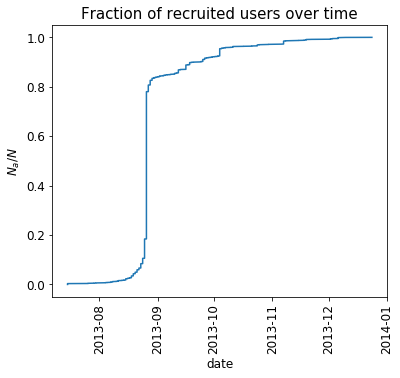

In [291]:
# get only the first time a unique user tweet/retweet or replies with relevant #hash
unique_users = tweets.drop_duplicates(subset="user_screen_name", keep="first")

# sort by date
unique_users = unique_users.sort_values(by="date")

# reset index
unique_users = unique_users.reset_index()

# get cumulative distribution, each user adds 1 to the count
count_cumulative = [i + 1 for i in range(len(unique_users))]
prop_cumulative = [i / len(unique_users) for i in range(len(unique_users))]

# plot the distribution
plt.figure(figsize=(6, 5))
plt.plot(unique_users.date, prop_cumulative)
plt.xticks(rotation=90)
plt.xlabel("date", size=12)
plt.ylabel("$N_a/N$", size=12)
plt.title("Fraction of recruited users over time", size=15)
plt.xticks(size=12)
plt.yticks(size=12)

In [279]:
# unique dates
dates = unique_users.date.unique()
dates[0]

datetime.date(2013, 7, 15)

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


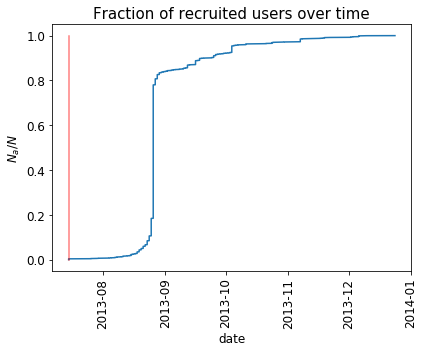

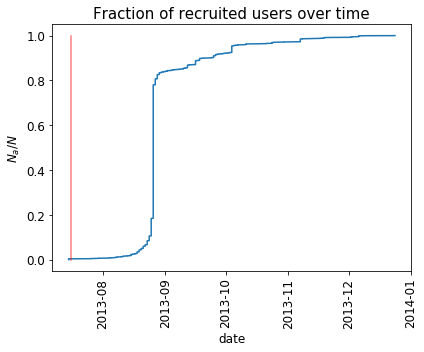

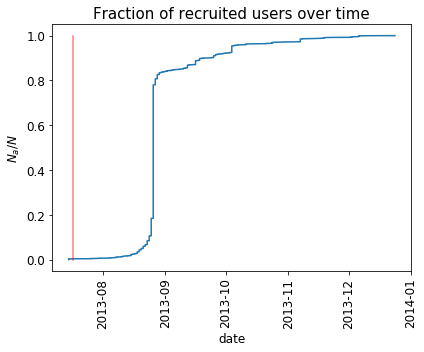

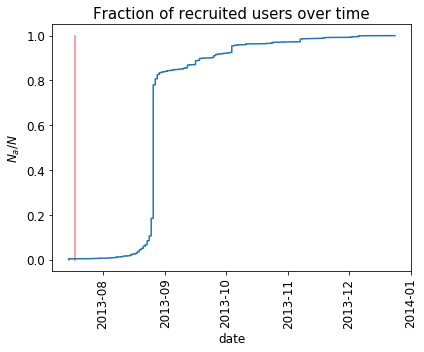

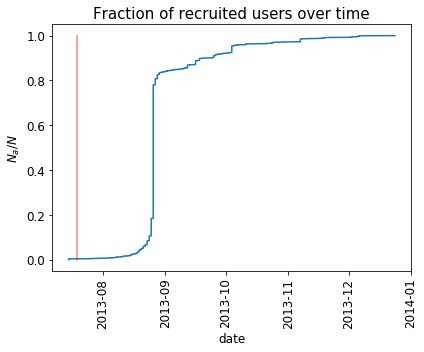

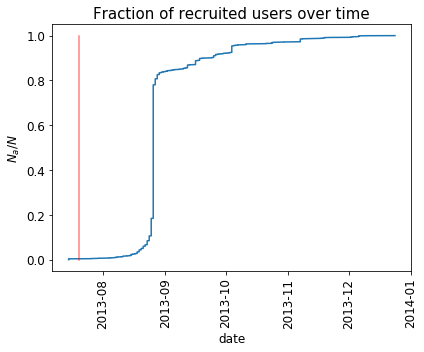

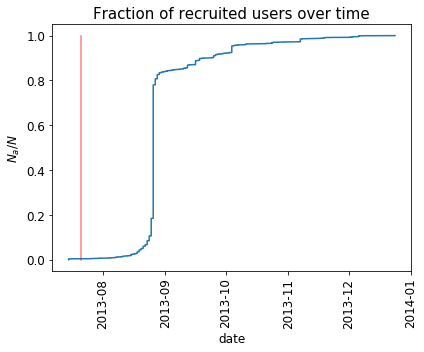

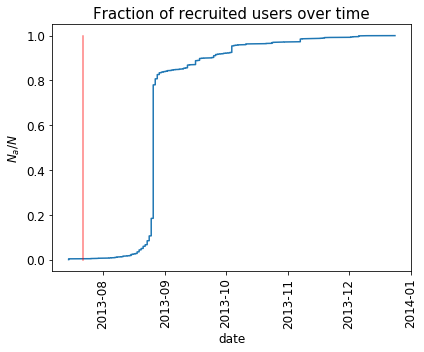

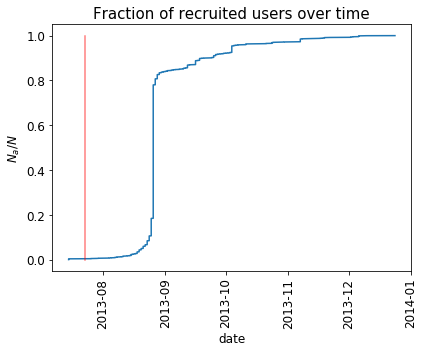

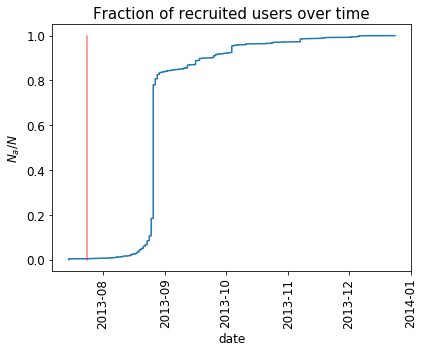

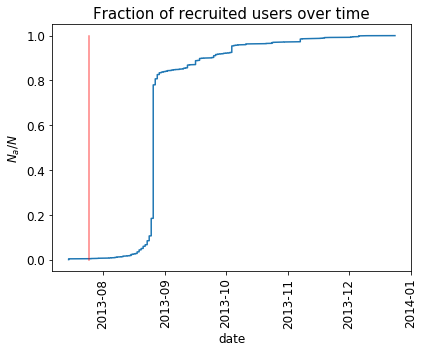

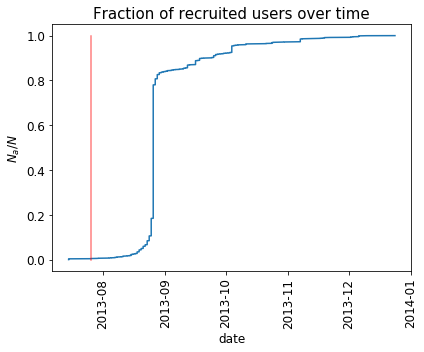

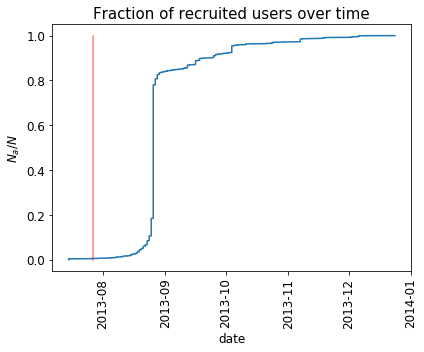

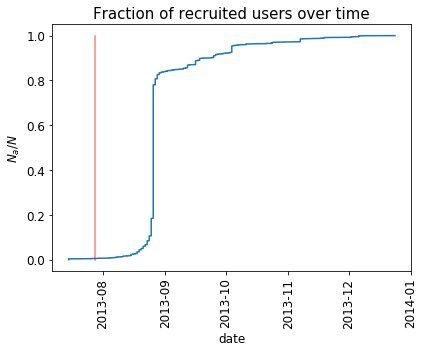

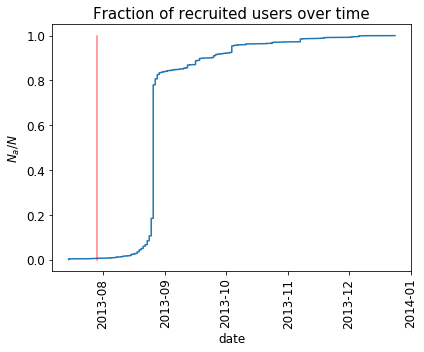

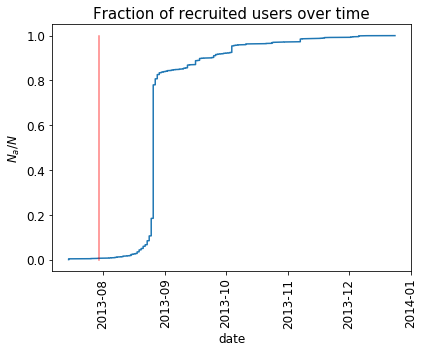

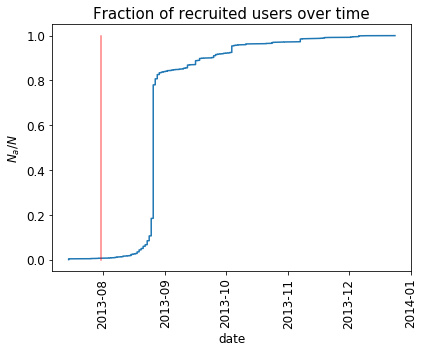

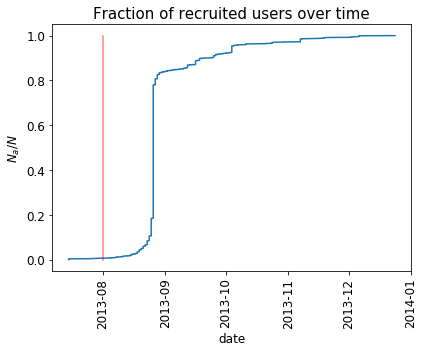

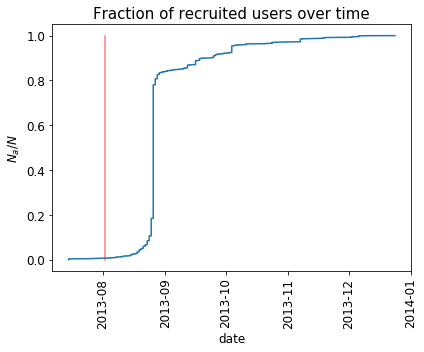

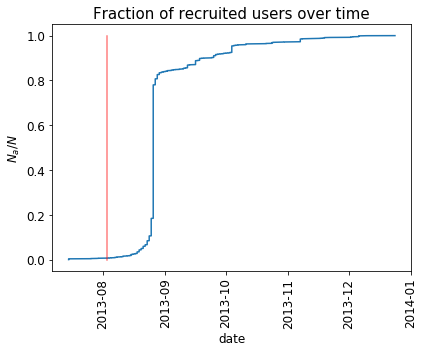

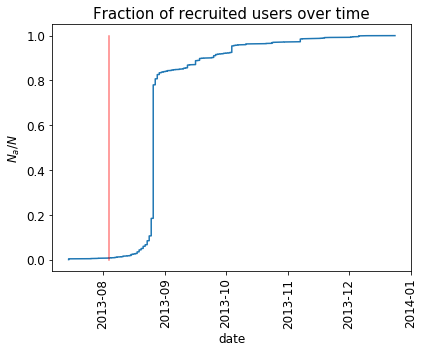

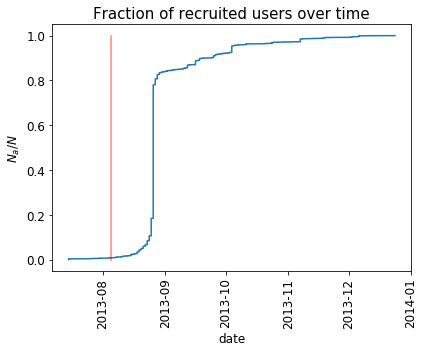

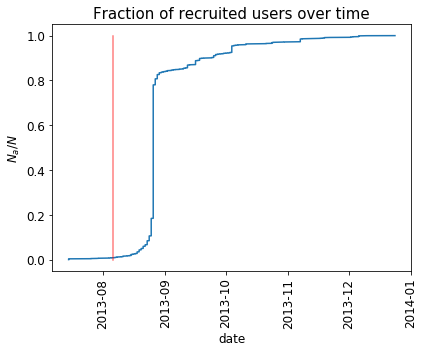

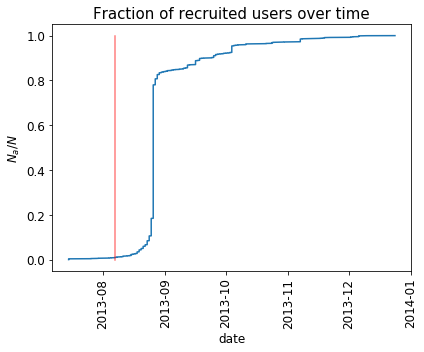

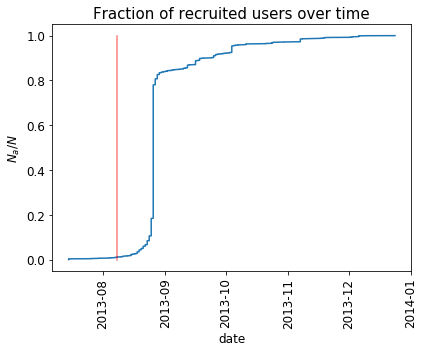

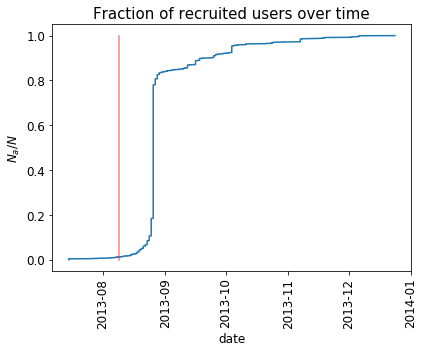

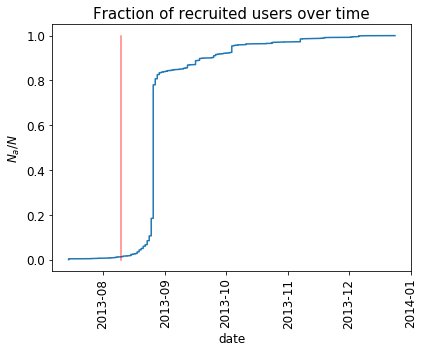

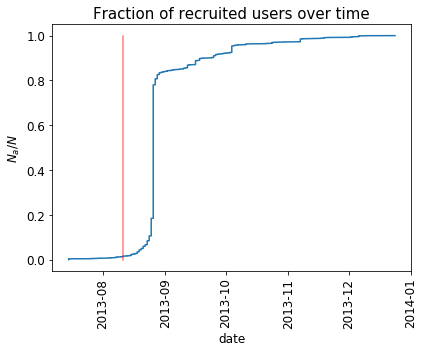

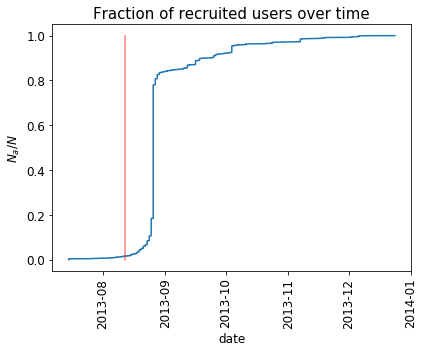

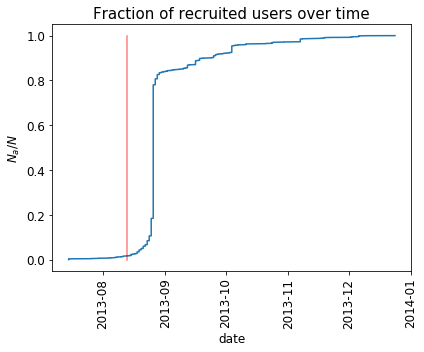

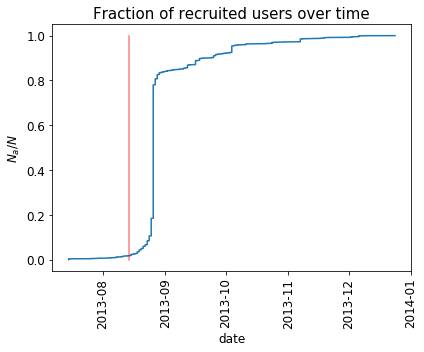

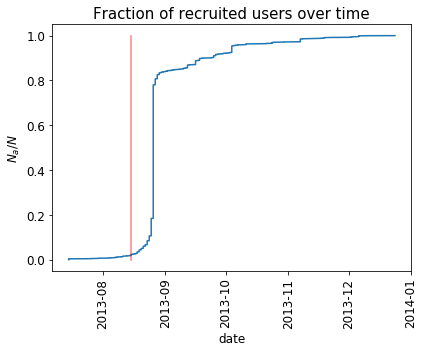

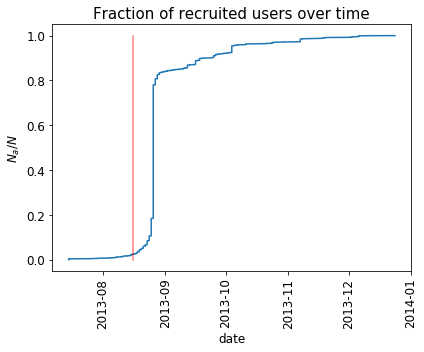

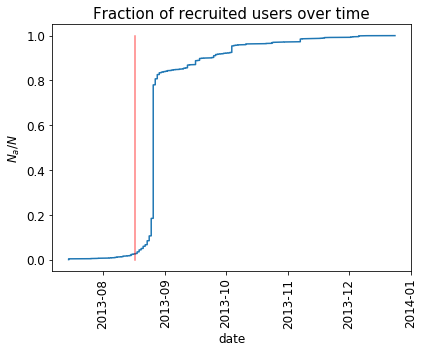

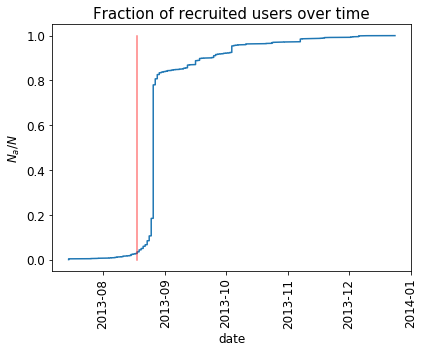

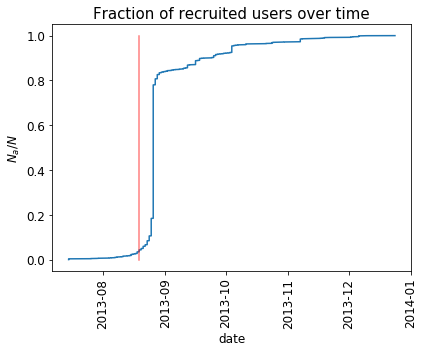

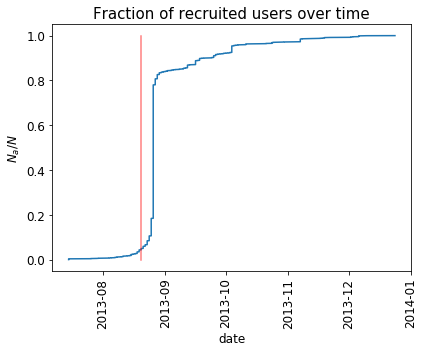

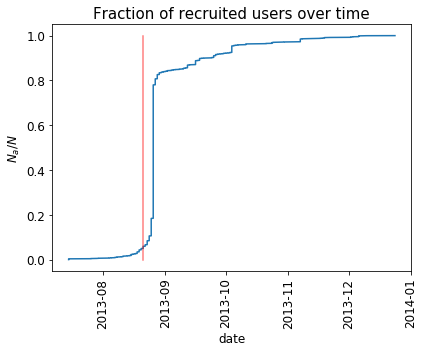

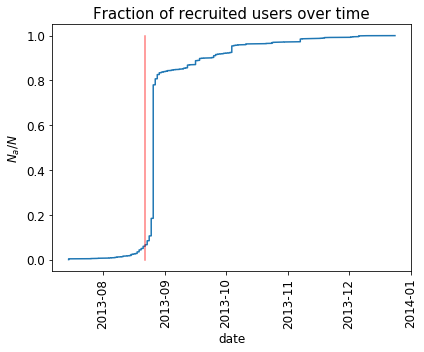

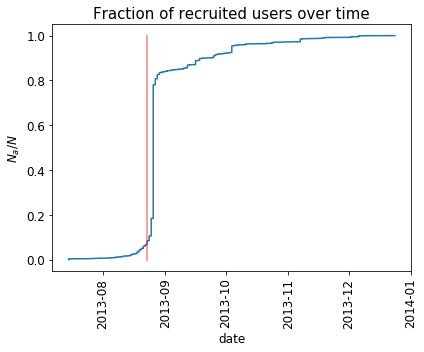

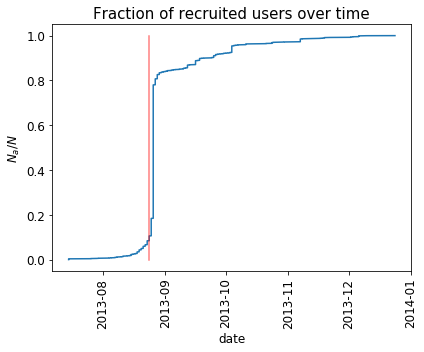

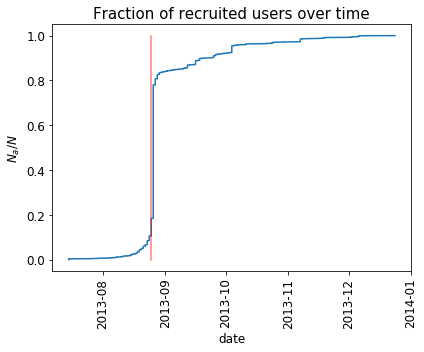

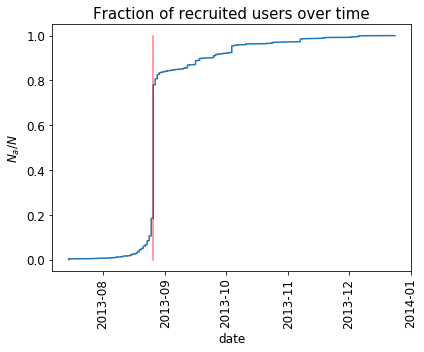

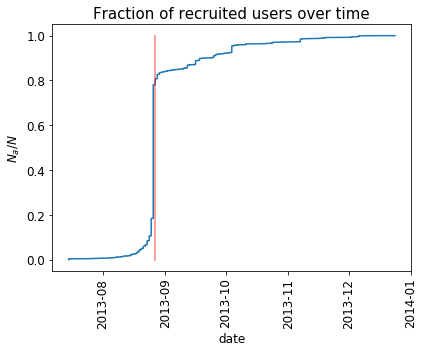

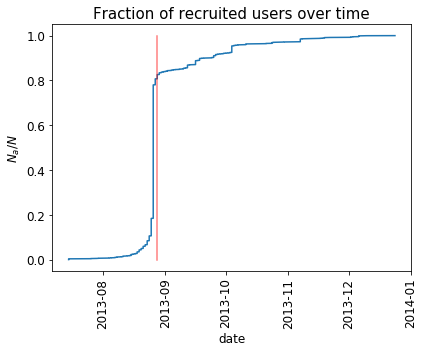

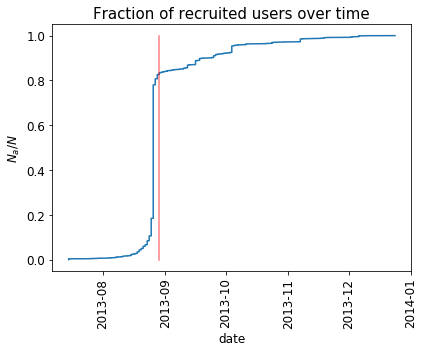

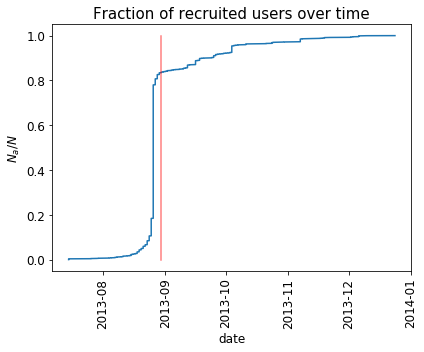

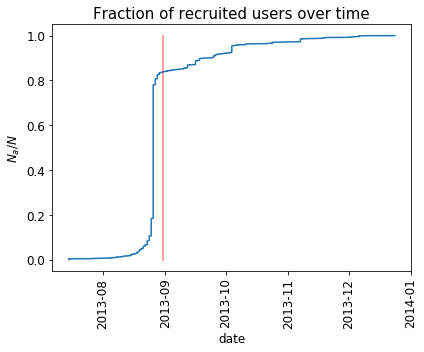

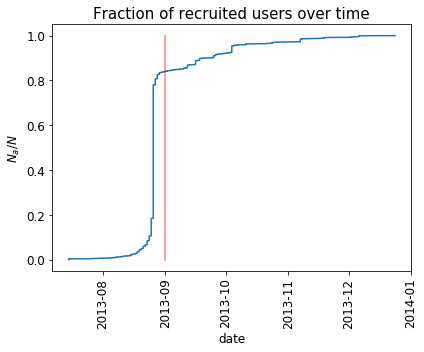

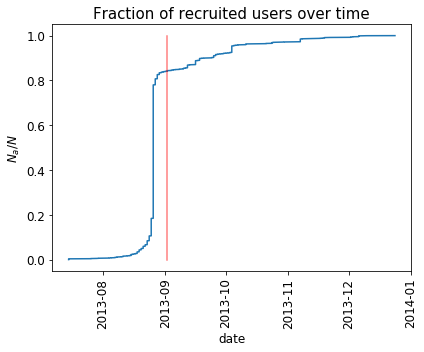

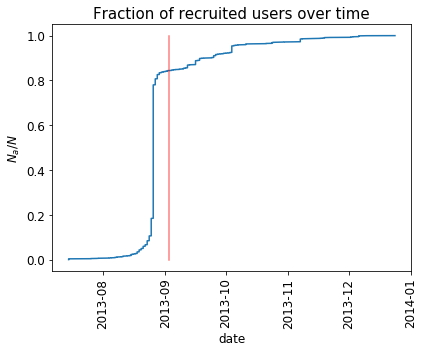

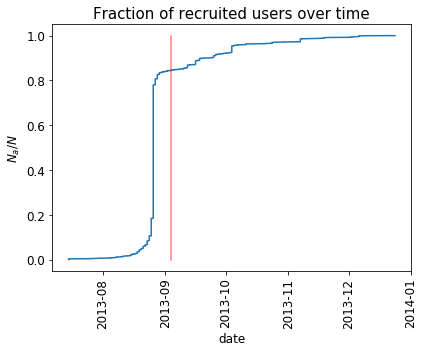

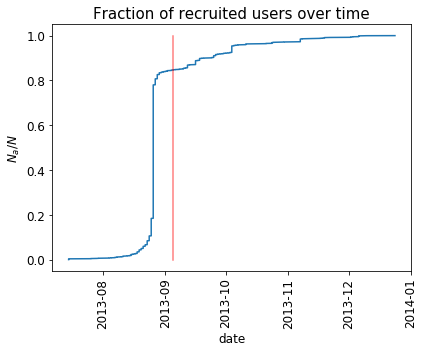

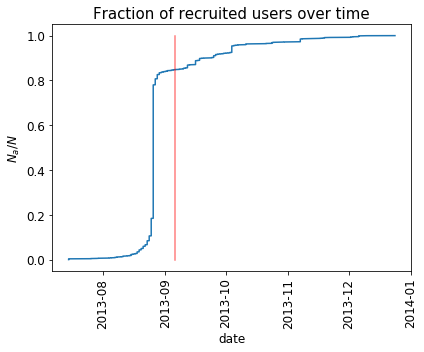

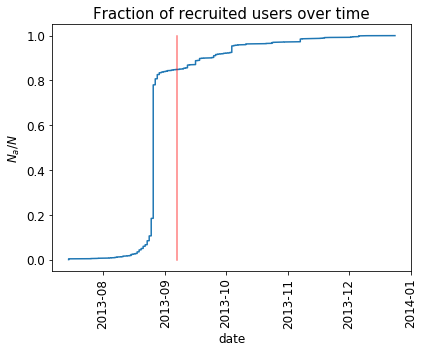

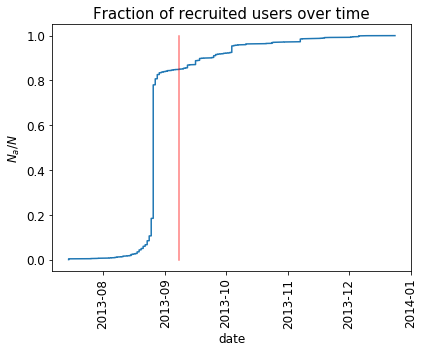

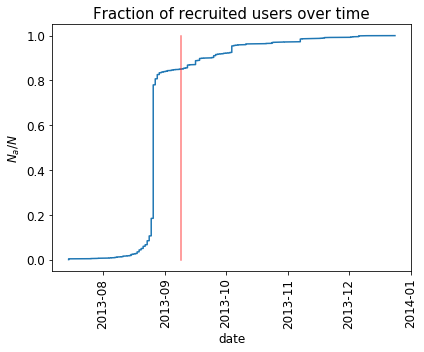

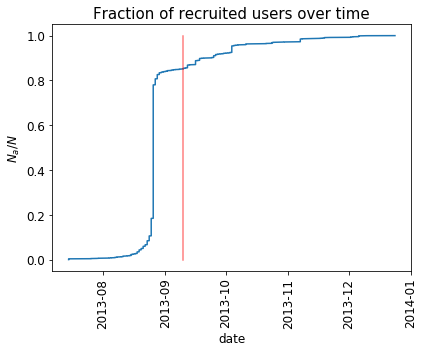

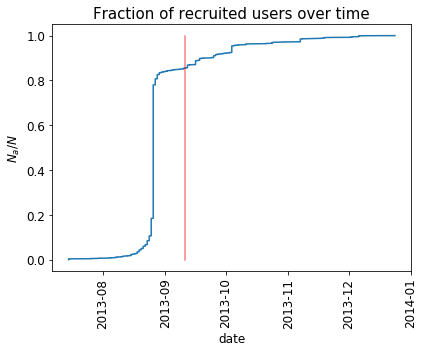

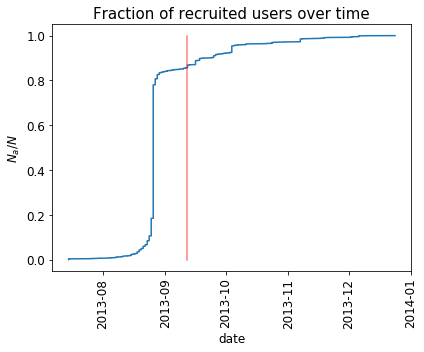

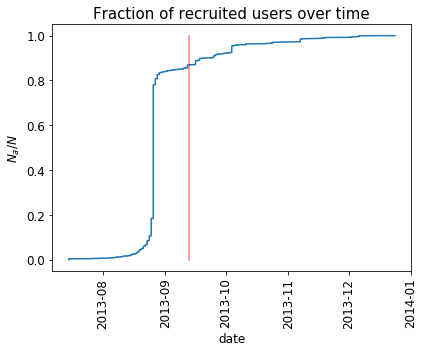

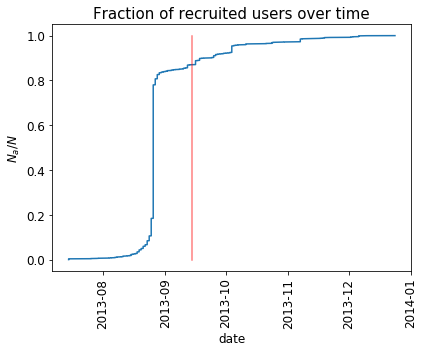

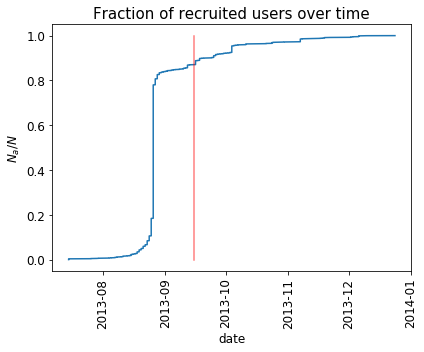

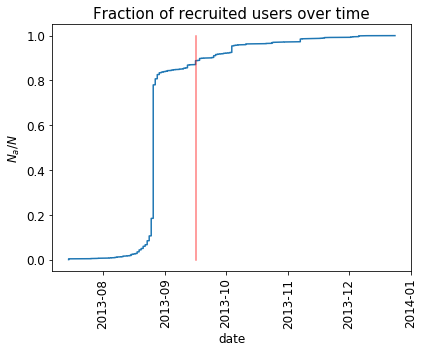

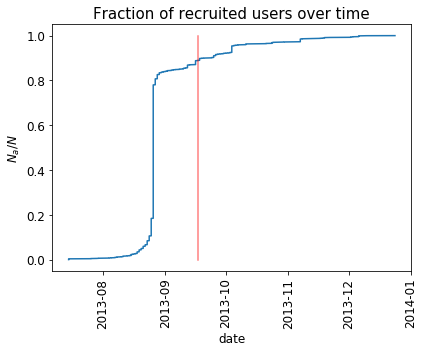

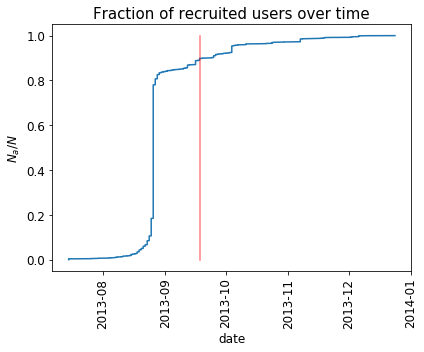

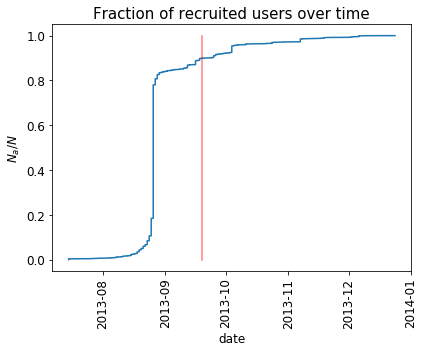

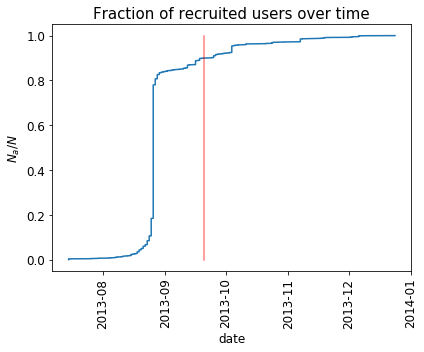

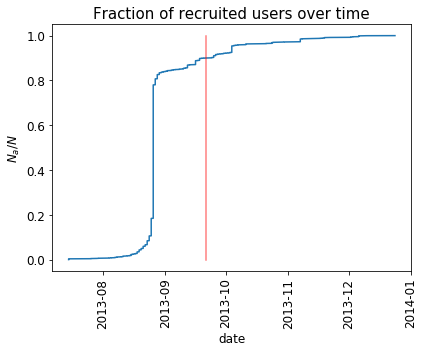

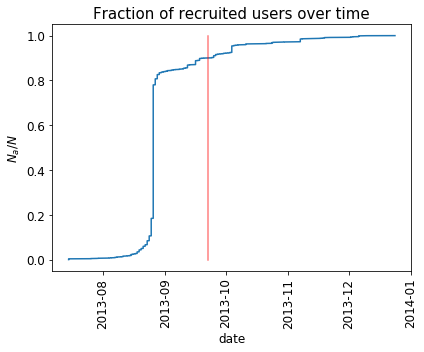

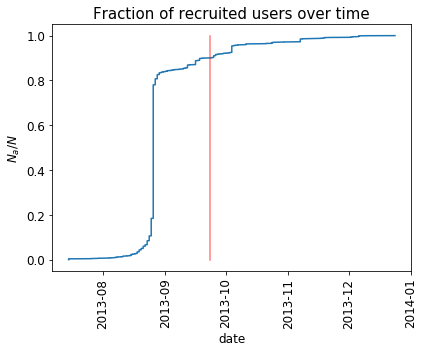

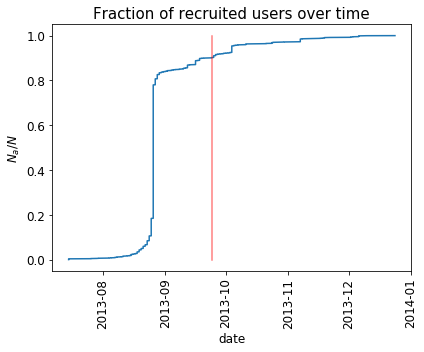

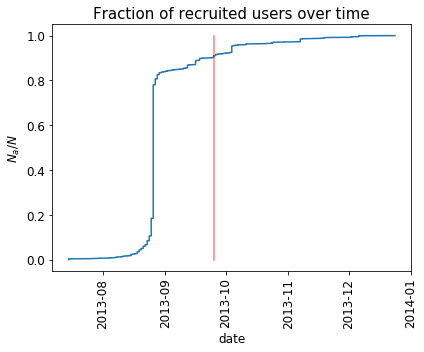

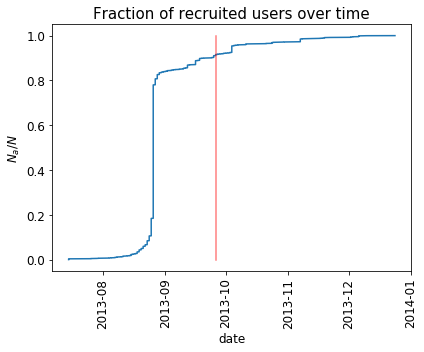

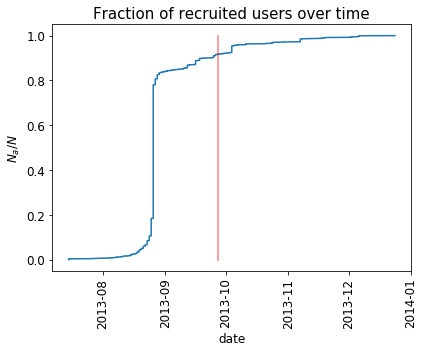

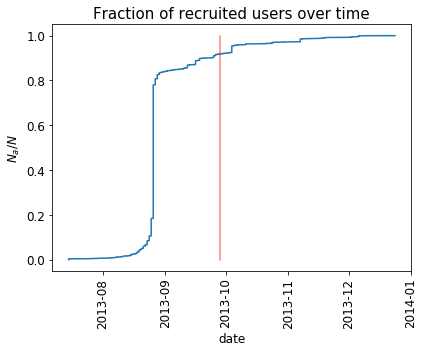

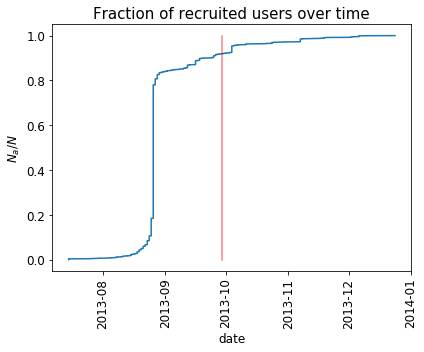

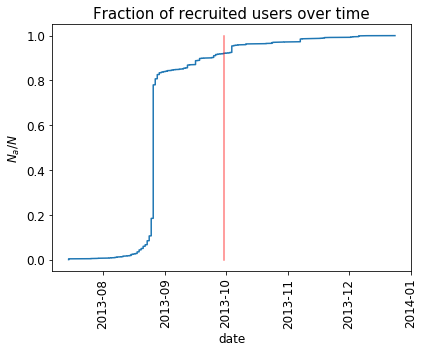

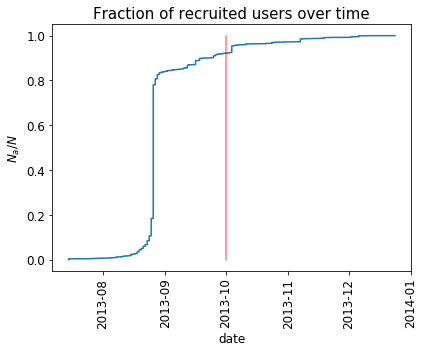

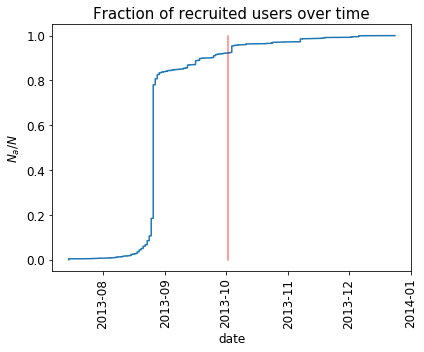

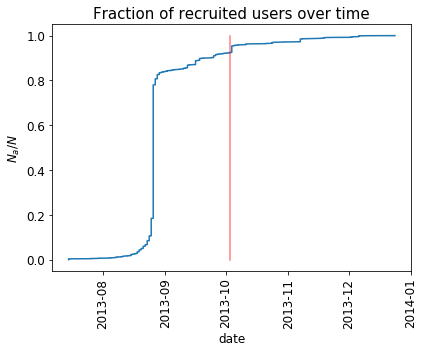

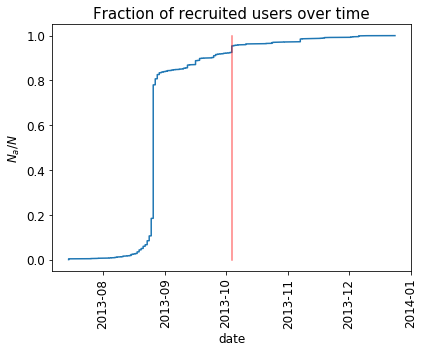

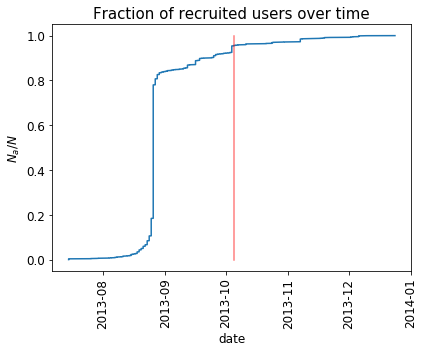

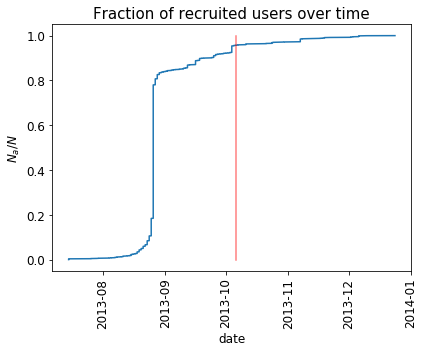

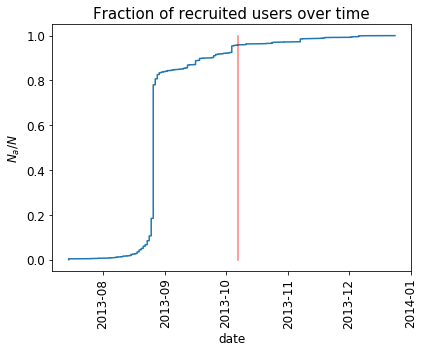

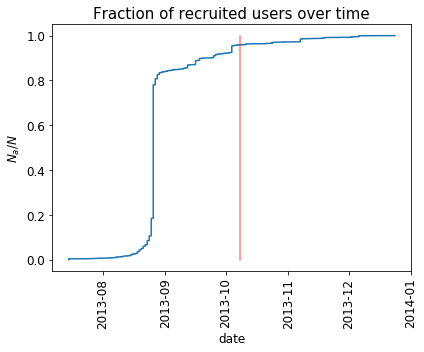

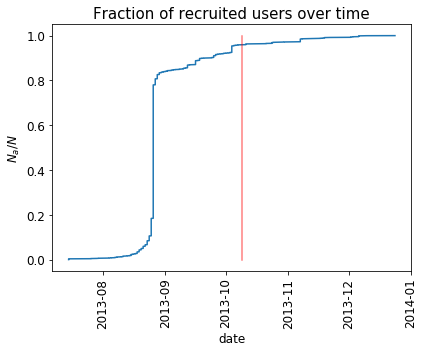

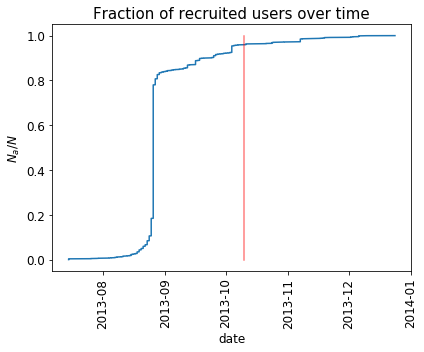

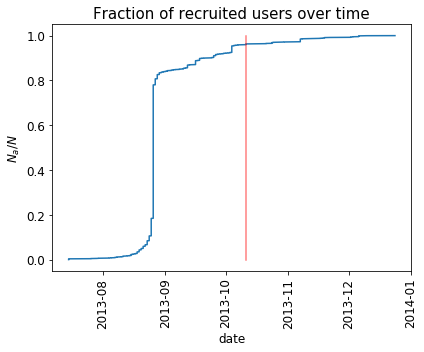

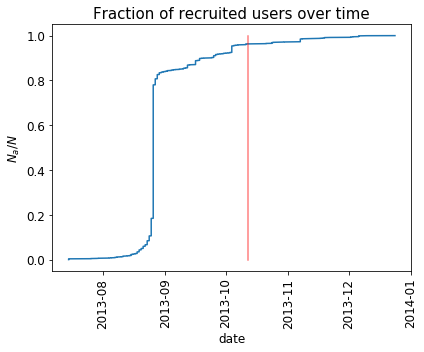

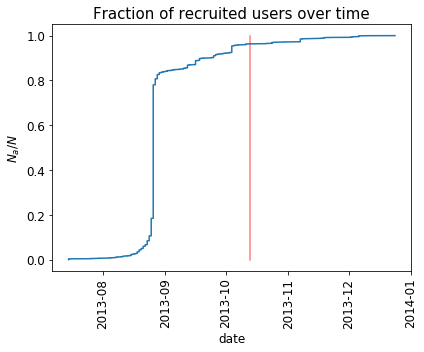

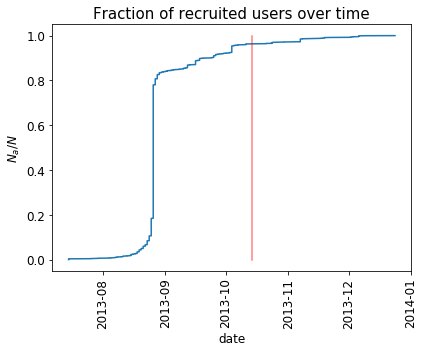

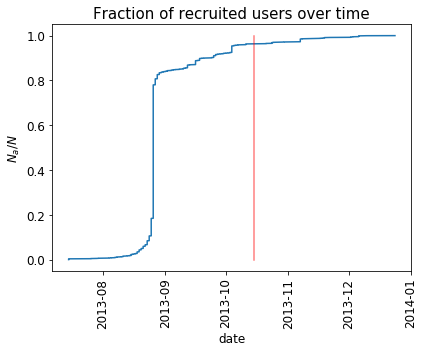

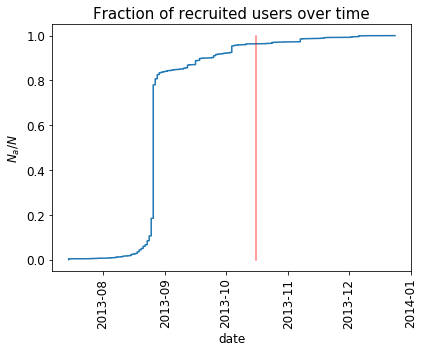

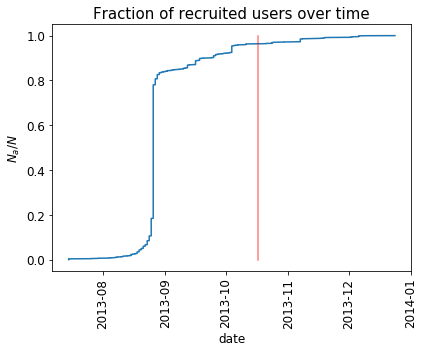

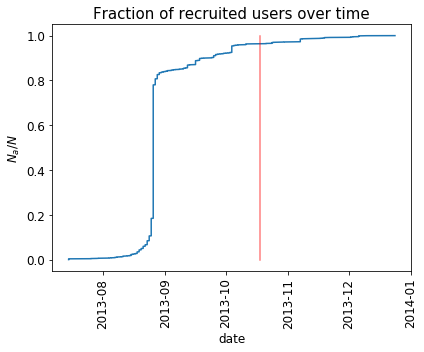

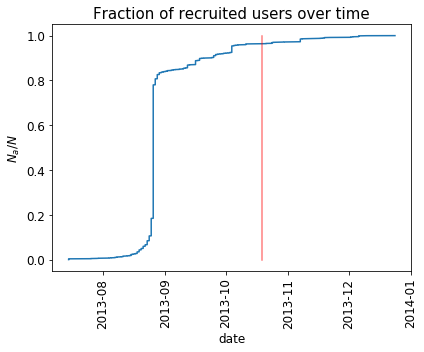

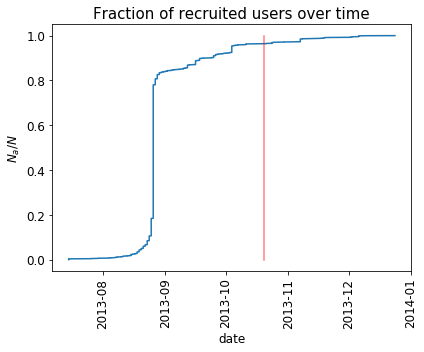

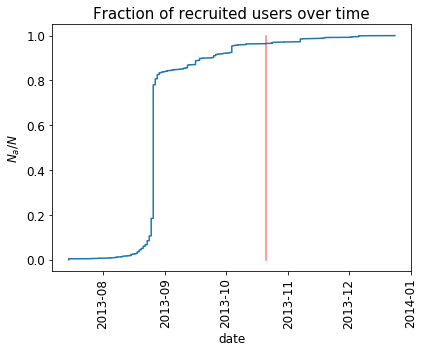

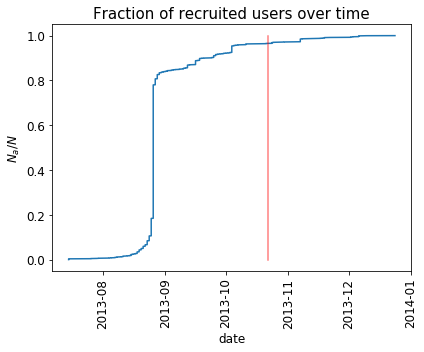

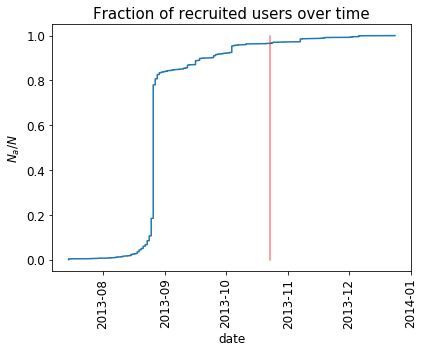

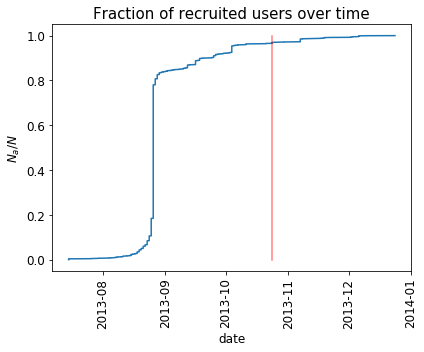

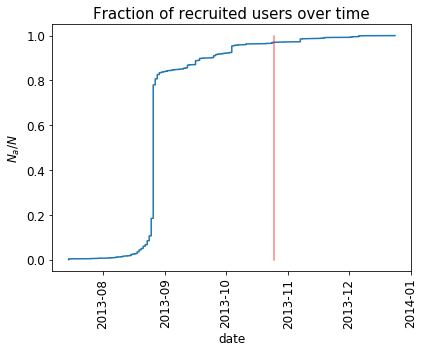

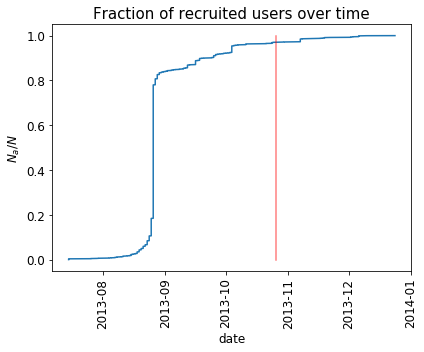

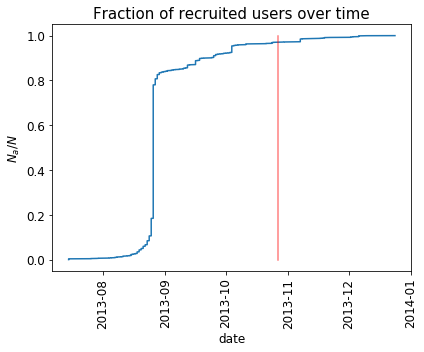

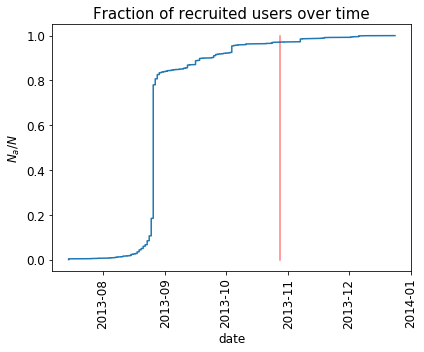

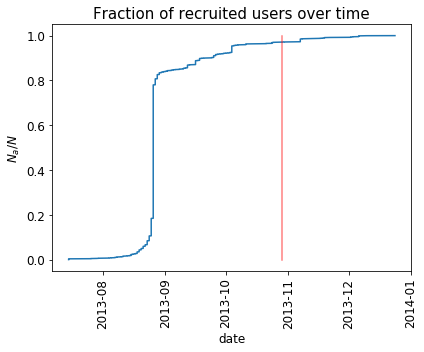

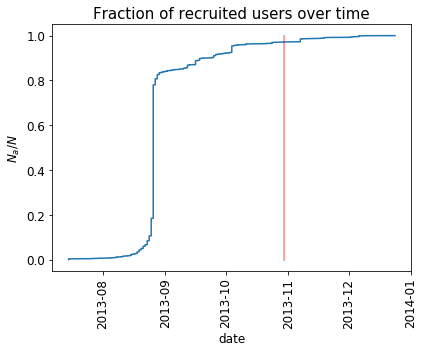

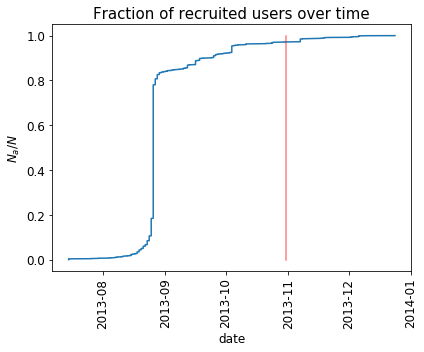

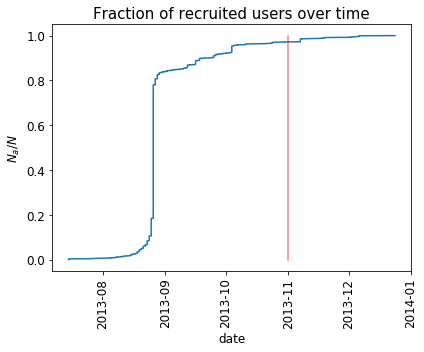

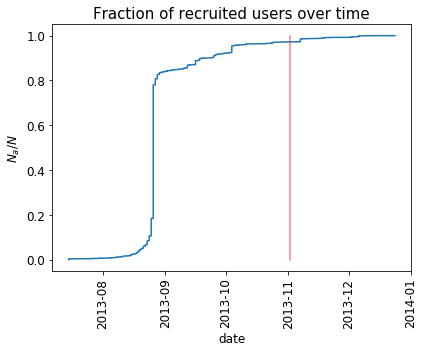

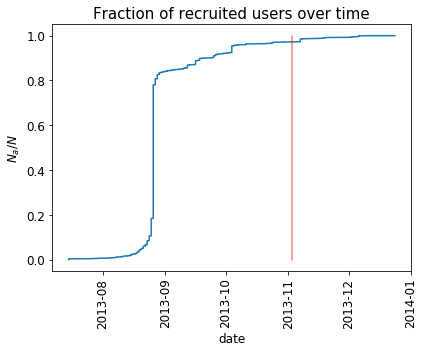

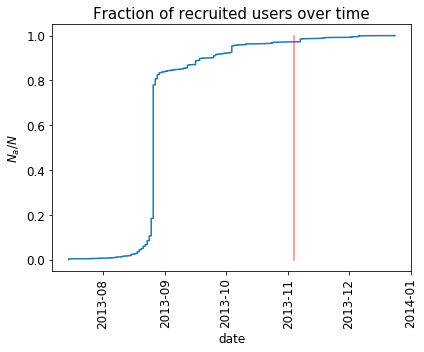

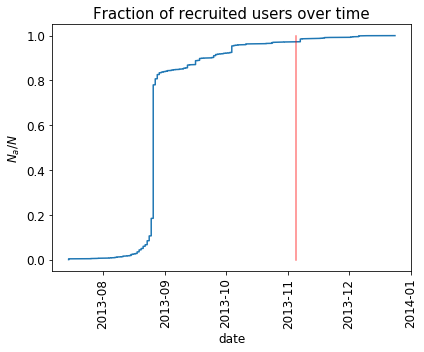

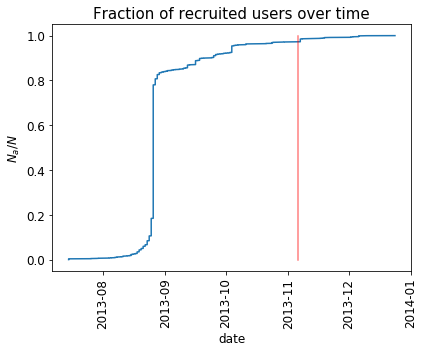

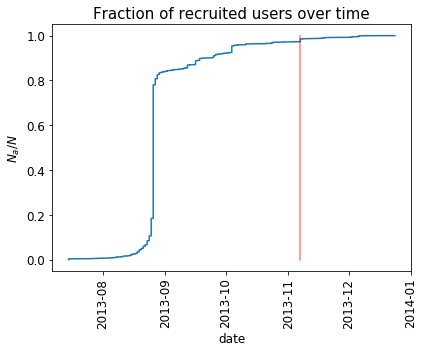

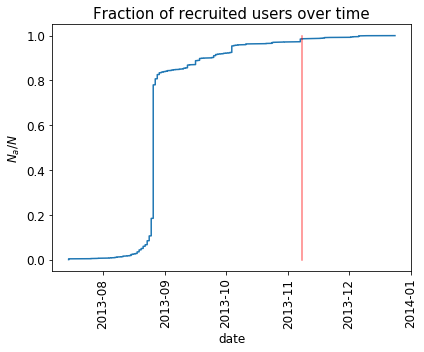

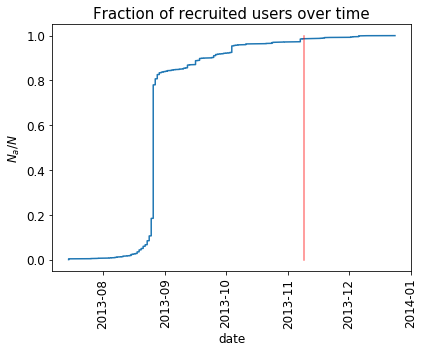

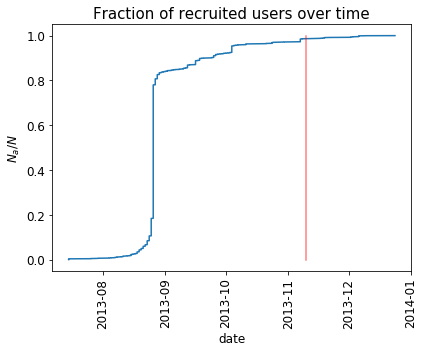

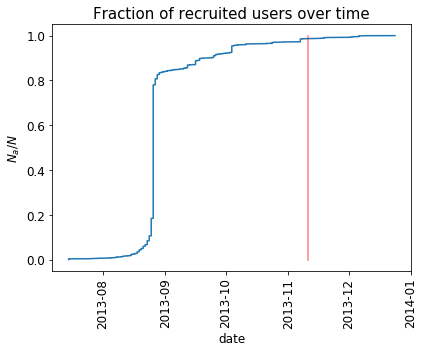

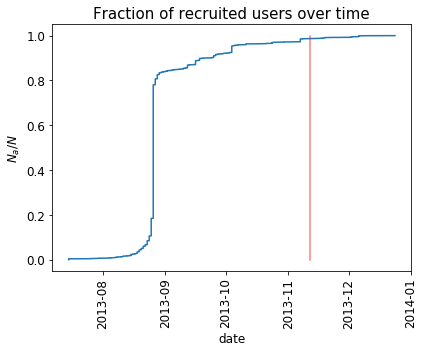

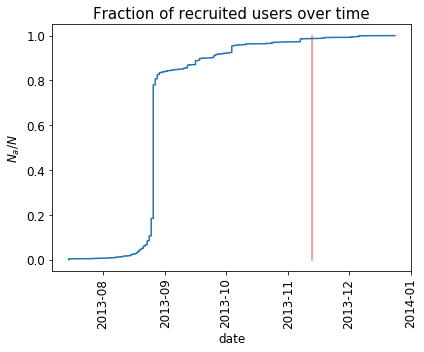

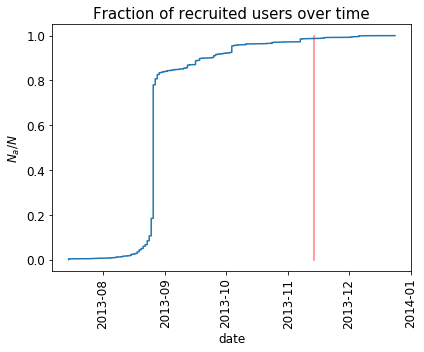

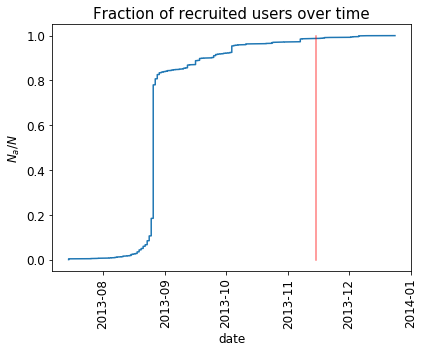

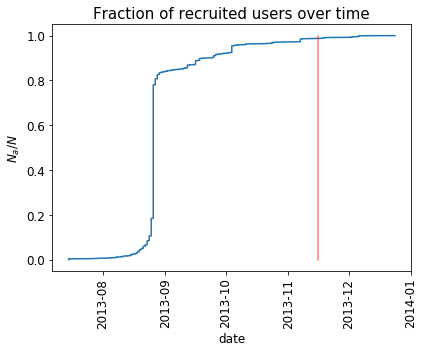

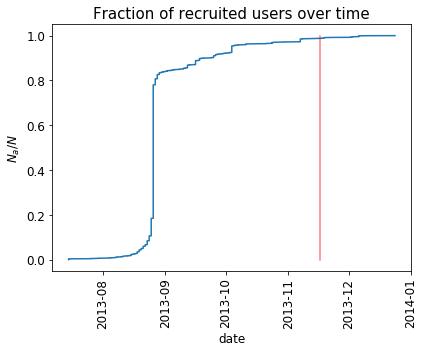

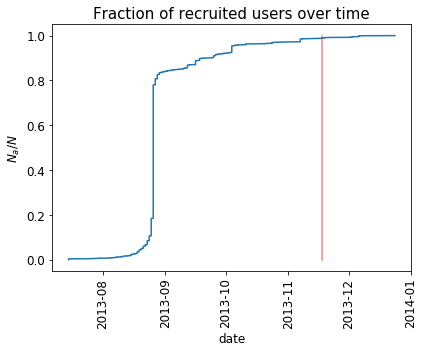

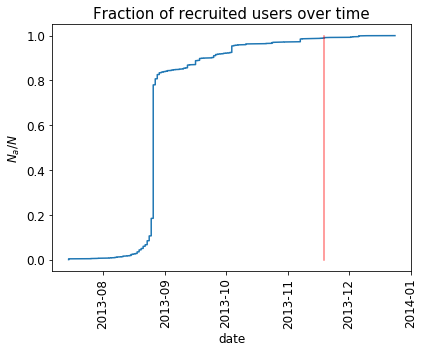

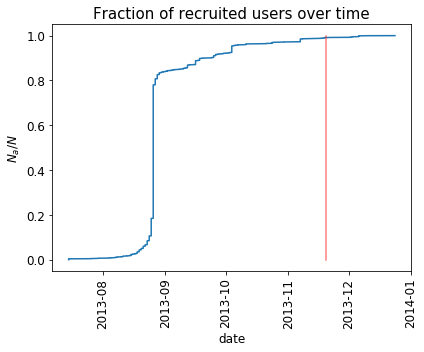

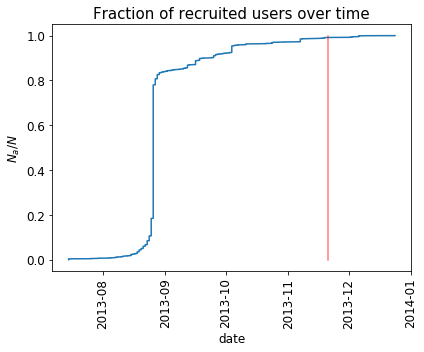

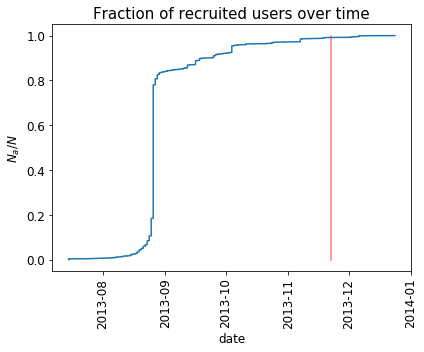

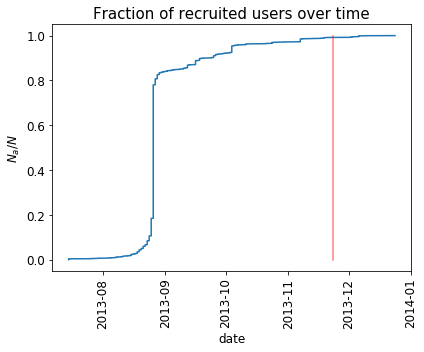

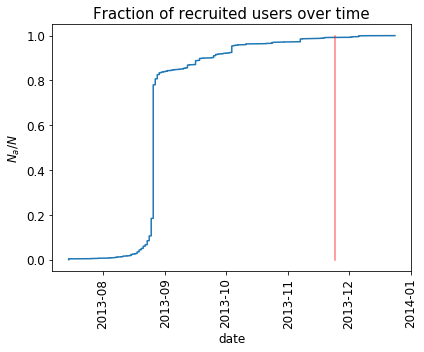

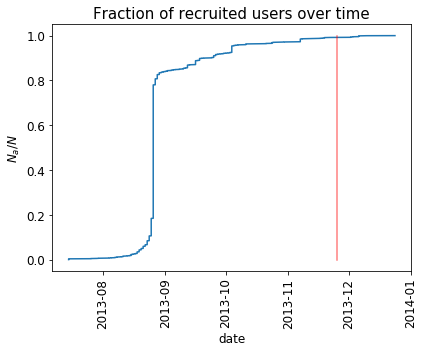

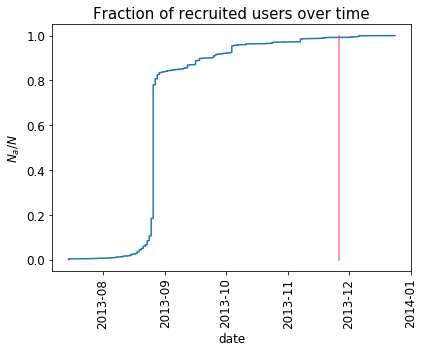

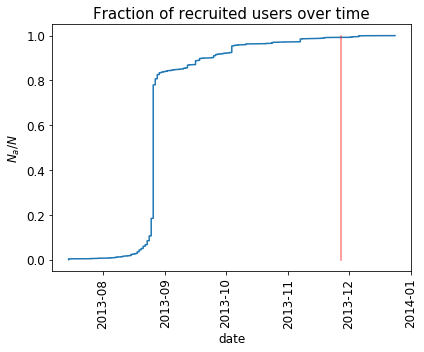

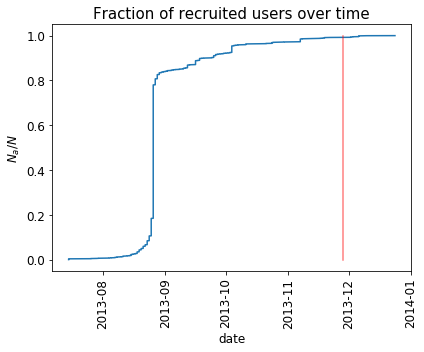

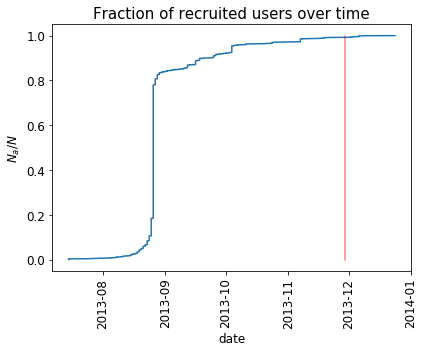

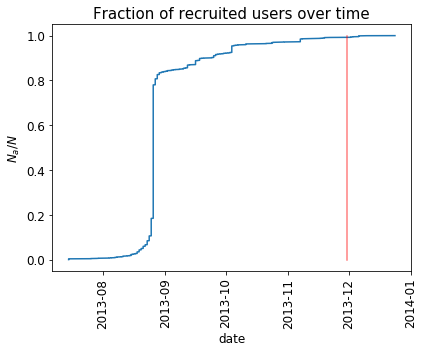

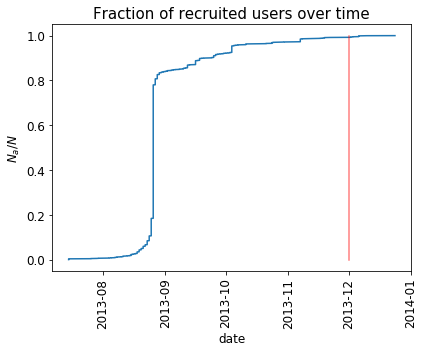

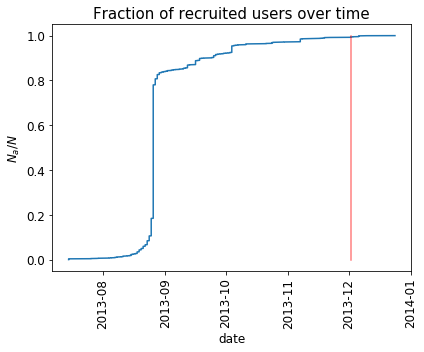

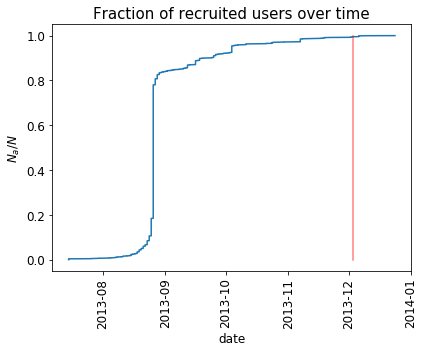

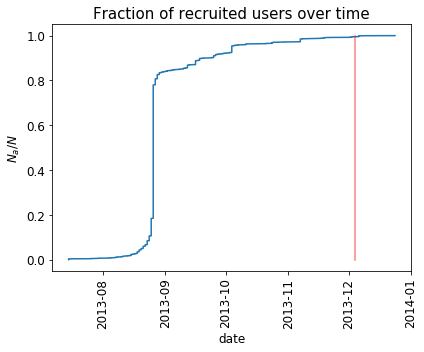

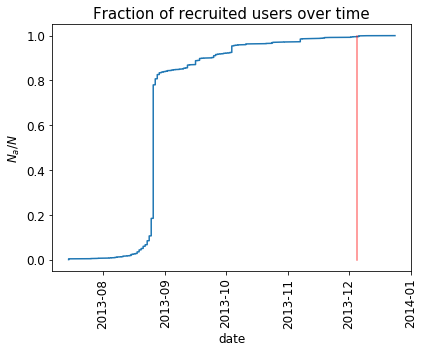

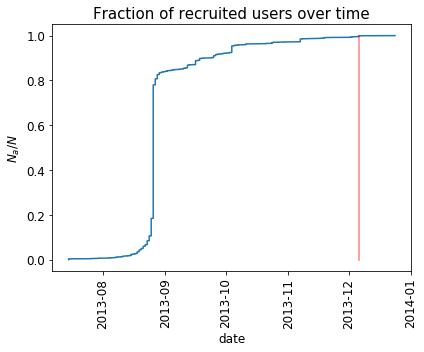

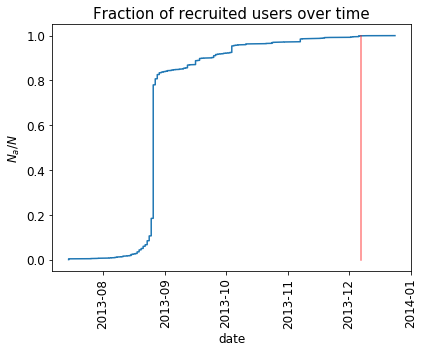

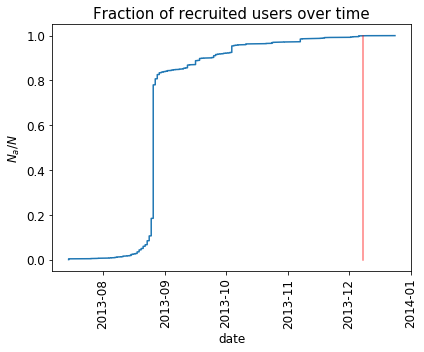

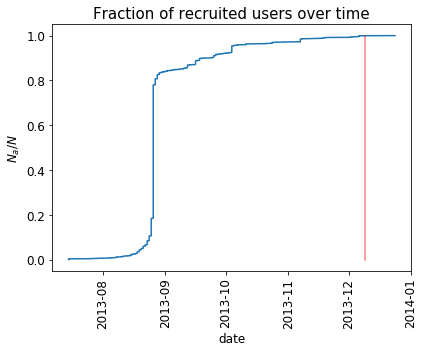

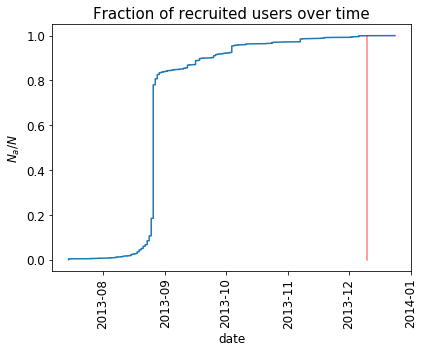

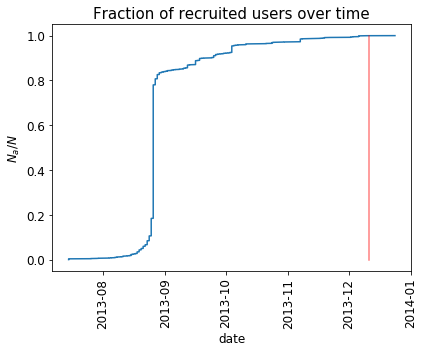

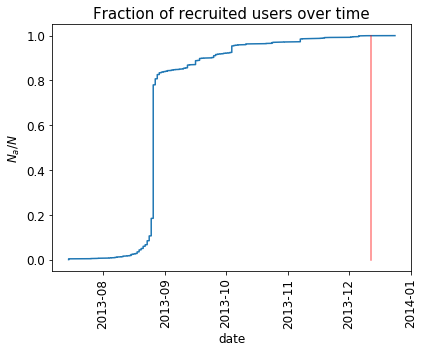

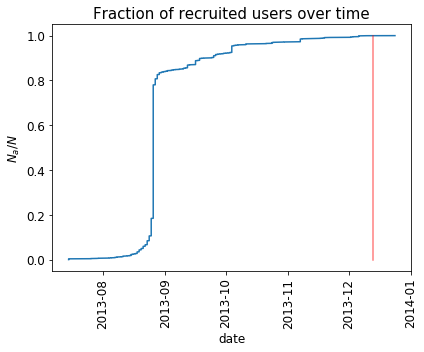

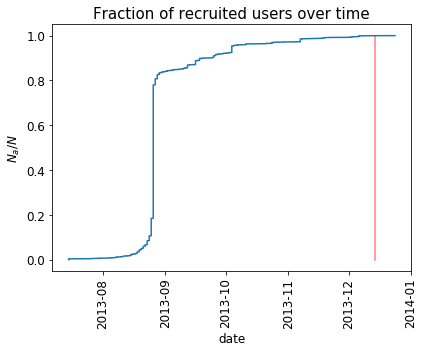

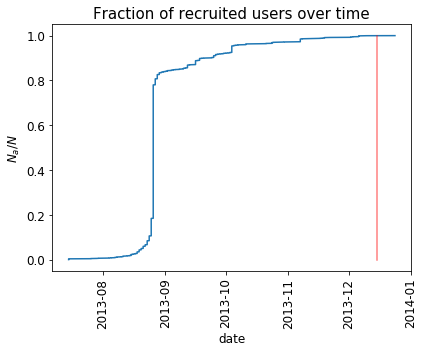

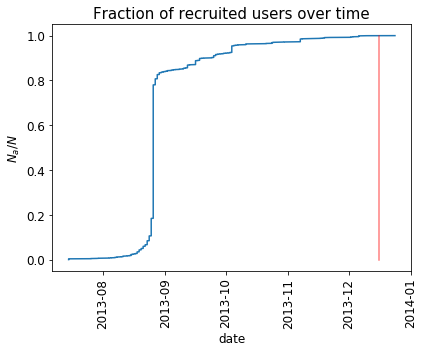

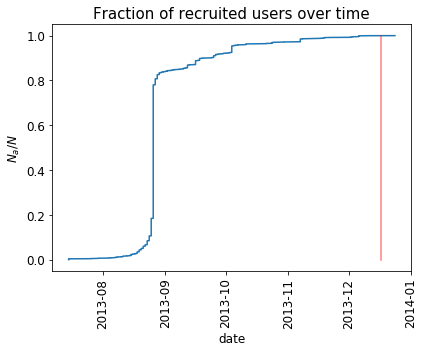

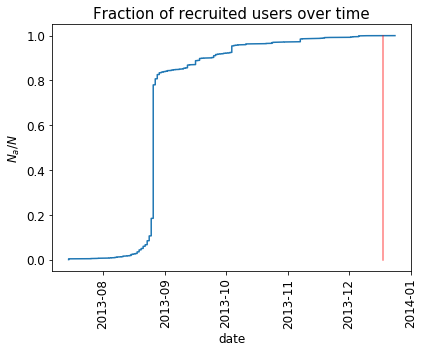

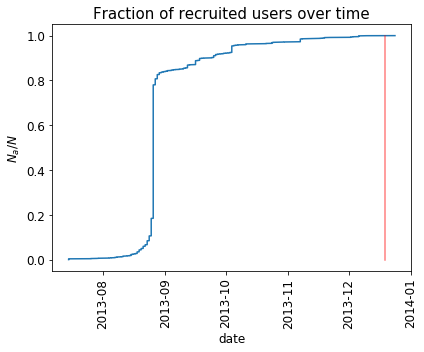

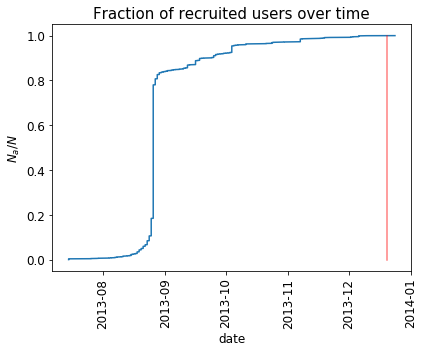

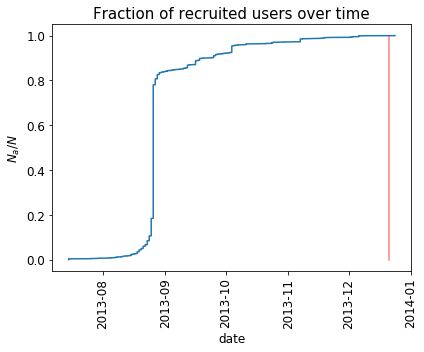

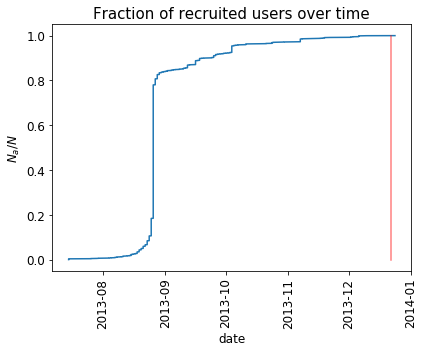

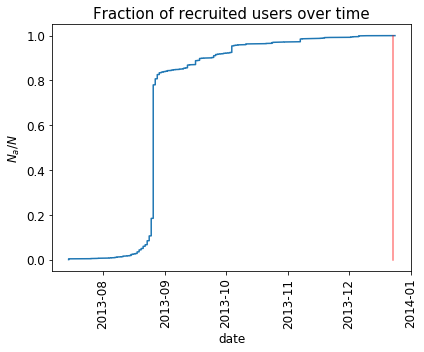

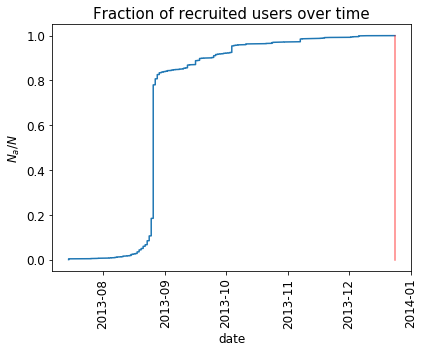

In [293]:
date = dates[0]
end_date = dates[-1]
delta = timedelta(days=1)
    
while date <= end_date:
    
    # get cumulative distribution, each user adds 1 to the count
    count_cumulative = [i + 1 for i in range(len(unique_users))]
    prop_cumulative = [i / len(unique_users) for i in range(len(unique_users))]

    # plot the distribution
    plt.figure(figsize=(6, 5))
    plt.plot(unique_users.date, prop_cumulative)
    plt.xticks(rotation=90)
    plt.xlabel("date", size=12)
    plt.ylabel("$N_a/N$", size=12)
    plt.title("Fraction of recruited users over time", size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)

    # vertical line that moves along the time axis per day
    plt.plot([date, date], [0, 1], c='r', alpha=0.5)
    date += delta
    
    plt.tight_layout()
    plt.savefig(f"images/recruitment_vs_time/{date}.png")

In [ ]:
# get only the first time a unique user tweet/retweet or replies with relevant #hash
unique_users = tweets.drop_duplicates(subset="user_screen_name", keep="first")

# sort by date
unique_users = unique_users.sort_values(by="date")

# reset index
unique_users = unique_users.reset_index()

# get cumulative distribution, each user adds 1 to the count
count_cumulative = [i + 1 for i in range(len(unique_users))]
prop_cumulative = [i / len(unique_users) for i in range(len(unique_users))]

# plot the distribution
plt.plot(unique_users.date, prop_cumulative)
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("$N_a/N$")
plt.title("Fraction of recruited users over time")

In [30]:
# HOW MANY IF NO MEDIA - Symmetric Network
# get only the first time a unique user tweet/retweet or replies with relevant #hash

In [31]:
# get days with most frequent tweets
unique_users.date.dt.date.value_counts()[:10]

2013-08-26    3829
2013-08-25     503
2013-10-04     188
2013-08-27     173
2013-08-24     139
2013-08-28     122
2013-08-23     114
2013-09-16     114
2013-09-12      79
2013-11-07      78
Name: date, dtype: int64

In [32]:
## DO THE SAME ABOVE FOR COMBINATIONS OF TWEETS, RETWEETS, and REPLIES

In [33]:
# number of unique users
len(unique_users)

6424

In [34]:
# Add date column to tweets data (without time)
tweets['date'] = [tweets.date[i].date() for i in range(len(tweets))]

# Number of tweets and unique tweets and replies
# No retweets
print("No. of tweets/replies:", len(tweets))
print("No. of unique tweets/replies:", len(tweets.text.unique()))

# Add date to nodes data for filtering say of degrees?

No. of tweets/replies: 10669
No. of unique tweets/replies: 7517


In [35]:
# check for similar tweet_id values - there shouldn't be duplicates
# WE CAN REMOVE THIS
for i in range(len(tweets)):
    if len(tweets[tweets.tweet_id == tweets.tweet_id.values[i]]) > 1:
        display(tweets[tweets.tweet_id == tweets.tweet_id.values[i]])


## Filtering Only Users that Tweeted the #Hashtag and their Followers (who may or may not have tweeted/retweeted/replied the #Hashtag)

### Asymmetric Graph

In [36]:
# get list of unique user_screen_name in pandas dataframe
# this is the list that is both in the followers list and in the tweets data
# No yet concern for TIME so WE USE tweets_0
# tweets, replies, and retweets
final_users = list(tweets_0.user_screen_name.unique())
len(final_users)

8666

In [37]:
# filter user - follower dictionary to include only those selected above
# users_followers = {k: unified_followers[k] for k in final_users}
# Get the intersection of user:followers list and the tweets

# some users in the dataframe has not been scraped yet
users_followers_everyone = {}
for k in final_users:
    try: users_followers_everyone[k] = unified_followers[k]
    except: continue

# these are the keys only
len(users_followers_everyone)

8574

In [38]:
# make a network using the filtered users_followers above
# load Graph of followers
# includes nodes that may not have tweeted about the protest
G_everyone = nx.from_dict_of_lists(users_followers_everyone, create_using=nx.DiGraph())

len(G_everyone.nodes)

305537

In [39]:
# check if there are 0 degrees. Should be none
[v for k, v in dict(G_everyone.degree).items() if v ==0]

[]

#### Basic Properties

In [40]:
# out degree
degs = [k for n, k in G_everyone.out_degree]
avg_deg = np.mean(degs)
min_deg = np.min(degs)
max_deg = np.max(degs)

vals = {"avg_degree":[avg_deg], "min_degree":[min_deg], "max_degree":[max_deg]}
pd.DataFrame.from_dict(vals).T

0
avg_degree     1.195043
min_degree     0.000000
max_degree  1961.000000

In [41]:
# in degree
degs = [k for n, k in G_everyone.in_degree]
avg_deg = np.mean(degs)
min_deg = np.min(degs)
max_deg = np.max(degs)

vals = {"avg_degree":[avg_deg], "min_degree":[min_deg], "max_degree":[max_deg]}
pd.DataFrame.from_dict(vals).T

0
avg_degree    1.195043
min_degree    0.000000
max_degree  347.000000

In [42]:
# degree
degs = [k for n, k in G_everyone.degree]
avg_deg = np.mean(degs)
min_deg = np.min(degs)
max_deg = np.max(degs)

vals = {"avg_degree":[avg_deg], "min_degree":[min_deg], "max_degree":[max_deg]}
pd.DataFrame.from_dict(vals).T

0
avg_degree     2.390087
min_degree     1.000000
max_degree  2043.000000

#### Degree Distribution

Text(0.5,1,'Out degree distribution')

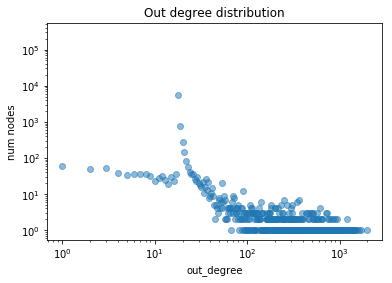

In [43]:
# out degree distribution
degs = [v for k, v in G_everyone.out_degree]

# count
deg_count = Counter(degs)

# plot
plt.loglog(deg_count.keys(), deg_count.values(), 'o', alpha=0.5)

plt.xlabel("out_degree")
plt.ylabel("num nodes")
plt.title("Out degree distribution")

Text(0.5,1,'In degree distribution')

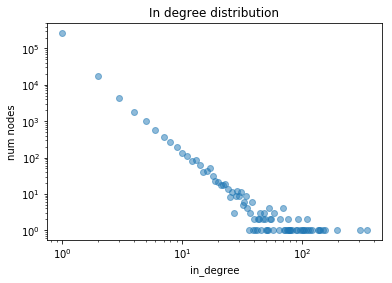

In [44]:
# in degree distribution
degs = [v for k, v in G_everyone.in_degree]

# count
deg_count = Counter(degs)

# plot
plt.loglog(deg_count.keys(), deg_count.values(), 'o', alpha=0.5)

plt.xlabel("in_degree")
plt.ylabel("num nodes")
plt.title("In degree distribution")

Text(0.5,1,'Degree distribution')

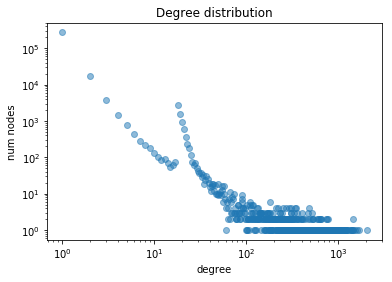

In [45]:
# degree distribution
degs = [v for k, v in G_everyone.degree]

# count
deg_count = Counter(degs)

# plot
plt.loglog(deg_count.keys(), deg_count.values(), 'o', alpha=0.5)

plt.xlabel("degree")
plt.ylabel("num nodes")
plt.title("Degree distribution")

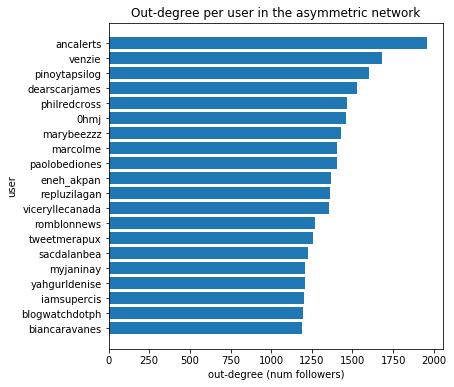

In [46]:
# top degrees in asymmetric networks
ind = np.argsort([v for k, v in G_everyone.out_degree])
top_users = list(np.array([k for k, v in G_everyone.out_degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in G_everyone.out_degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("Out-degree per user in the asymmetric network")
plt.xlabel("out-degree (num followers)")
plt.ylabel("user")
plt.show()

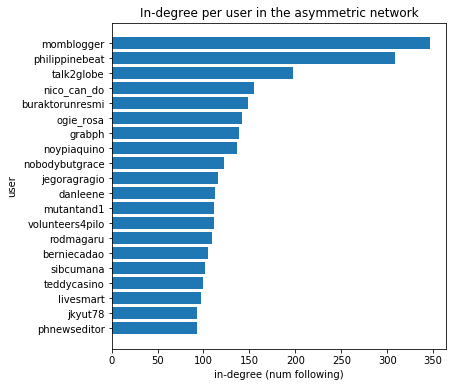

In [47]:
# top degrees in asymmetric networks
ind = np.argsort([v for k, v in G_everyone.in_degree])
top_users = list(np.array([k for k, v in G_everyone.in_degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in G_everyone.in_degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("In-degree per user in the asymmetric network")
plt.xlabel("in-degree (num following)")
plt.ylabel("user")
plt.show()

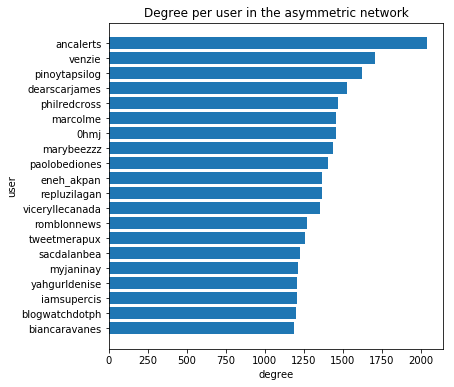

In [48]:
# top degrees in asymmetric networks
ind = np.argsort([v for k, v in G_everyone.degree])
top_users = list(np.array([k for k, v in G_everyone.degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in G_everyone.degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("Degree per user in the asymmetric network")
plt.xlabel("degree")
plt.ylabel("user")
plt.show()

In [49]:
# # Use spring layout
# pos_G_everyone = nx.spring_layout(G_everyone)

In [50]:
# # draw graph
# plt.figure(figsize=(6, 6))

# # draw graph
# nx.draw(G_everyone, pos=pos_G_everyone, node_size=1, width=0.1, with_labels=False)

# # save fig
# plt.savefig("graphs/asymm_everyone.png")

In [51]:
# # giant component only
# # convert to undirected first (no connected_component_subgraphs for directed)
# G_everyone_undirected = G_everyone.to_undirected()
# G_everyone_giant = max(nx.connected_component_subgraphs(G_everyone_undirected), key=len)
# len(G_everyone_giant.nodes)

In [52]:
# # Use spring layout
# n = len(G_everyone_giant.nodes)
# pos_G_everyone_giant = nx.spring_layout(G_everyone_giant, k=10*1/np.sqrt(n))

In [53]:
# # draw graph
# plt.figure(figsize=(6, 6))

# # draw graph
# nx.draw(G_everyone_giant, pos=pos_G_everyone_giant, node_size=1, width=0.1, with_labels=False)

# # save fig
# plt.savefig("graphs/asymm_everyone_giant_comp.png")

### Symmetric Graph

The function below only selects that nodes that mutually follow each other (regardless if they tweeted about the protest or not). a <--> b will be preserved while c --> d will not be.

In [54]:
# Filter symmetric given dictionary of followers only
def filter_symmetric_from_dict(dic):
    # get dictionary of followers
    
    # define new dictionary    
    sym_dic = {}
    
    # run through keys and values
    for k, v in dic.items():
        # check if symmetric by looking at key and valu
        for i in v:
            try:
                if k in dic[i]:
                    if k in sym_dic:
                        sym_dic[k] += [i]
                    else:
                        sym_dic[k] = [i]
            except:
                continue
    return sym_dic

In [55]:
# a = {'z':['e', 'b'], 'a':['b', 'c', 'd'], 'b':['a', 'z'], 'c':['a'], 'd':['c'], 'e':['z']}
# filter_symmetric_from_dict(a)

In [56]:
# filter only symmetric
sym_users_followers_everyone = filter_symmetric_from_dict(users_followers_everyone)
len(sym_users_followers_everyone)

736

In [57]:
# load Graph of followers
H_everyone = nx.from_dict_of_lists(sym_users_followers_everyone)

In [58]:
# check if there are 0 degrees. Should be none
[v for k, v in dict(H_everyone.degree).items() if v ==0]

[]

#### Degree Distribution

Text(0.5,1,'Degree distribution')

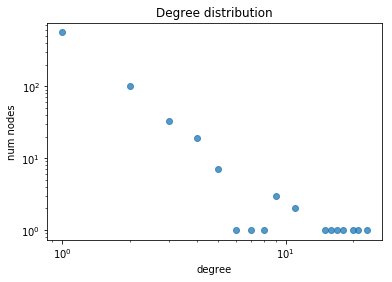

In [59]:
# degree distribution
degs = [v for k, v in H_everyone.degree]

# count
deg_count = Counter(degs)

x = np.array(list(deg_count.keys()))
inds = np.argsort(x)
x = x[inds]
y = np.array(list(deg_count.values()))
y = y[inds]

# plot
plt.loglog(x, y, 'o', alpha=0.75)

plt.xlabel("degree")
plt.ylabel("num nodes")
plt.title("Degree distribution")

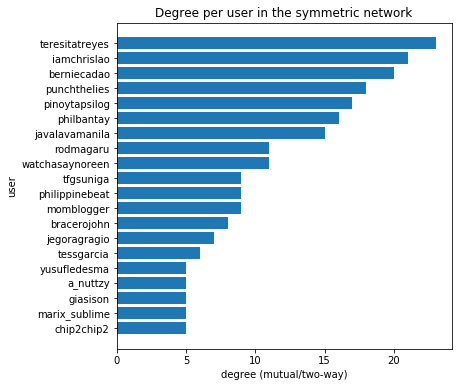

In [60]:
# top degrees in asymmetric networks
ind = np.argsort([v for k, v in H_everyone.degree])
top_users = list(np.array([k for k, v in H_everyone.degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in H_everyone.degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("Degree per user in the symmetric network")
plt.xlabel("degree (mutual/two-way)")
plt.ylabel("user")
plt.show()

In [61]:
# Use spring layout
pos_H_everyone = nx.spring_layout(H_everyone)

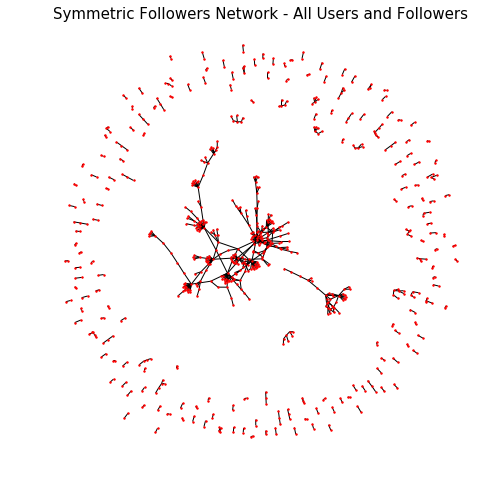

In [62]:
# draw graph
plt.figure(figsize=(6, 6))

# draw graph
nx.draw(H_everyone, pos=pos_H_everyone, node_size=2, with_labels=False)
plt.title("Symmetric Followers Network - All Users and Followers", size=15)

# save fig
plt.savefig("graphs/symm_everyone.png")

In [63]:
# giant component only
H_everyone_giant = max(nx.connected_component_subgraphs(H_everyone), key=len)

In [64]:
# Use spring layout
n = len(H_everyone_giant.nodes)
pos_H_everyone_giant = nx.spring_layout(H_everyone_giant, k=1/np.sqrt(n))

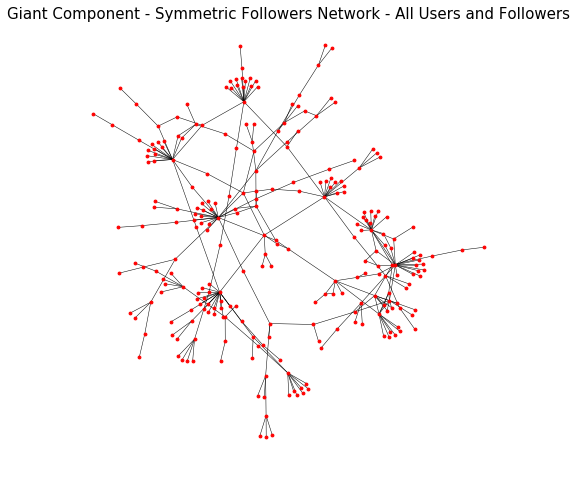

In [65]:
# draw graph
plt.figure(figsize=(6, 6))

# draw graph
nx.draw(H_everyone_giant, pos=pos_H_everyone_giant, node_size=8, width=0.5, with_labels=False)
plt.title("Giant Component - Symmetric Followers Network - All Users and Followers", size=15)

# save fig
plt.savefig("graphs/symm_everyone_giant_component.png")

## Filter Only the Networks Whose Nodes Tweeted About the #Hashtags

In [66]:
# get only nodes (following and followers) that are in a specific list
def filter_users_from_dic(followers_dic, user_list):
    # make dictionary of filtered keys
    # filter user - follower dictionary to include only those that tweeted
    filtered_dic = {}
    for k in user_list:
        try: 
            filtered_dic[k] = followers_dic[k]
        except: 
            continue

    # filter values in dictionary - select only those in user_list
    for k, v in filtered_dic.items():
        filtered_dic[k] = [i for i in filtered_dic[k] if i in user_list]
        
    # some keys above will have no followers = [], remove these
    filtered_dic = {k:v for k, v in filtered_dic.items() if len(v) != 0}

    return filtered_dic

### Asymmetric Graph

In [67]:
# get list of unique user_screen_name in pandas dataframe
# this is the list that is both in the followers list and in the tweets data
# No yet concern for TIME so WE USE tweets_0
# tweets, replies, and retweets
final_users = list(tweets_0.user_screen_name.unique())
len(final_users)

8666

In [68]:
# Filter only the nodes in final_users list (tweeter data)
users_followers = filter_users_from_dic(unified_followers, final_users)
len(users_followers)

2664

In [69]:
# make a network using the filtered users_followers above
# load Graph of followers
G_filtered = nx.from_dict_of_lists(users_followers, create_using=nx.DiGraph())

len(G_filtered.nodes)

5713

In [264]:
# check if there are 0 degrees. Should be none
[v for k, v in dict(G_filtered.degree).items() if v ==0]

[]

In [272]:
min([v for k, v in G_filtered.degree])

1

#### Basic Properties

In [265]:
# out degree
degs = [k for n, k in G_filtered.out_degree]
avg_deg = np.mean(degs)
min_deg = np.min(degs)
max_deg = np.max(degs)

vals = {"avg_degree":[avg_deg], "min_degree":[min_deg], "max_degree":[max_deg]}
pd.DataFrame.from_dict(vals).T

0
avg_degree    3.526343
min_degree    0.000000
max_degree  446.000000

In [269]:
# in degree
degs = [k for n, k in G_filtered.in_degree]
avg_deg = np.mean(degs)
min_deg = np.min(degs)
max_deg = np.max(degs)

vals = {"avg_degree":[avg_deg], "min_degree":[min_deg], "max_degree":[max_deg]}
pd.DataFrame.from_dict(vals).T

0
avg_degree    3.526343
min_degree    0.000000
max_degree  347.000000

In [73]:
# degree
degs = [k for n, k in G_filtered.degree]
avg_deg = np.mean(degs)
min_deg = np.min(degs)
max_deg = np.max(degs)

vals = {"avg_degree":[avg_deg], "min_degree":[min_deg], "max_degree":[max_deg]}
pd.DataFrame.from_dict(vals).T

0
avg_degree    7.052687
min_degree    1.000000
max_degree  518.000000

#### Degree Distribution

Text(0.5,1,'Out degree distribution')

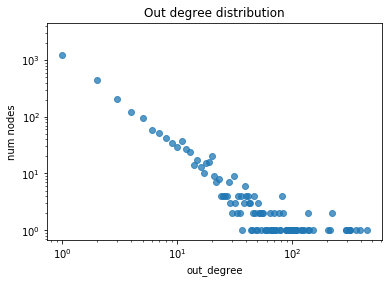

In [74]:
# out degree distribution
degs = [v for k, v in G_filtered.out_degree]

# count
deg_count = Counter(degs)

# plot
plt.loglog(deg_count.keys(), deg_count.values(), 'o', alpha=0.75)

plt.xlabel("out_degree")
plt.ylabel("num nodes")
plt.title("Out degree distribution")

Text(0.5,1,'In degree distribution')

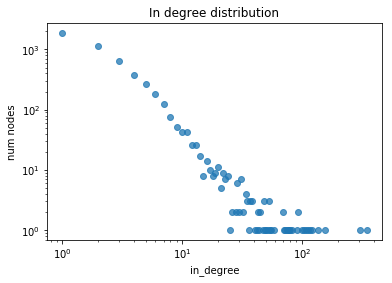

In [75]:
# in degree distribution
degs = [v for k, v in G_filtered.in_degree]

# count
deg_count = Counter(degs)

# plot
plt.loglog(deg_count.keys(), deg_count.values(), 'o', alpha=0.75)

plt.xlabel("in_degree")
plt.ylabel("num nodes")
plt.title("In degree distribution")

Text(0.5,1,'Degree distribution')

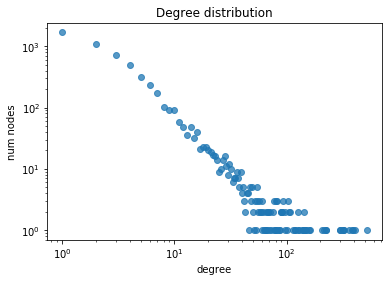

In [76]:
# degree distribution
degs = [v for k, v in G_filtered.degree]

# count
deg_count = Counter(degs)

# plot
plt.loglog(deg_count.keys(), deg_count.values(), 'o', alpha=0.75)

plt.xlabel("degree")
plt.ylabel("num nodes")
plt.title("Degree distribution")

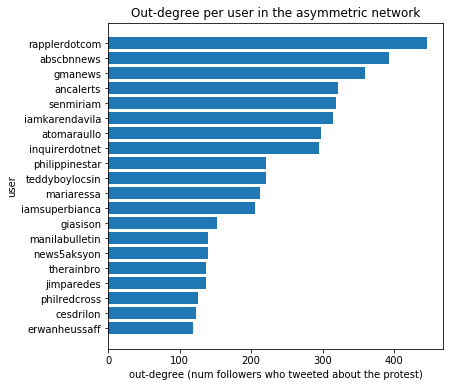

In [77]:
# top degrees in asymmetric networks
ind = np.argsort([v for k, v in G_filtered.out_degree])
top_users = list(np.array([k for k, v in G_filtered.out_degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in G_filtered.out_degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("Out-degree per user in the asymmetric network")
plt.xlabel("out-degree (num followers who tweeted about the protest)")
plt.ylabel("user")
plt.show()

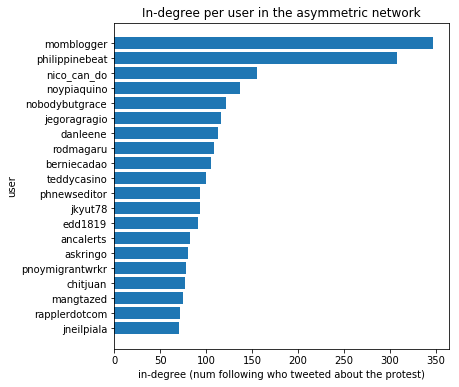

In [78]:
# top degrees in asymmetric networks
ind = np.argsort([v for k, v in G_filtered.in_degree])
top_users = list(np.array([k for k, v in G_filtered.in_degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in G_filtered.in_degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("In-degree per user in the asymmetric network")
plt.xlabel("in-degree (num following who tweeted about the protest)")
plt.ylabel("user")
plt.show()

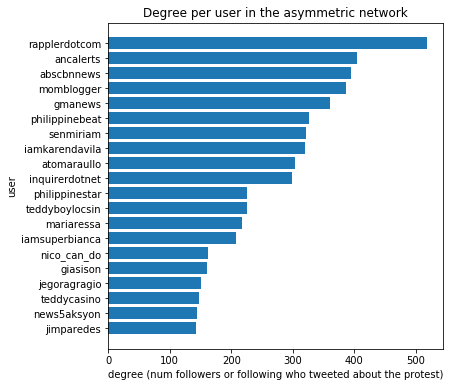

In [79]:
# top degrees in asymmetric networks
ind = np.argsort([v for k, v in G_filtered.degree])
top_users = list(np.array([k for k, v in G_filtered.degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in G_filtered.degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("Degree per user in the asymmetric network")
plt.xlabel("degree (num followers or following who tweeted about the protest)")
plt.ylabel("user")
plt.show()

In [80]:
# # Use spring layout
# pos_G_filtered = nx.spring_layout(G_filtered)

In [81]:
# # draw graph
# plt.figure(figsize=(6, 6))

# # draw graph
# nx.draw(G_filtered, pos=pos_G_filtered, node_size=1, width=0.01, with_labels=False)
# plt.title("Asymmetric Followers Network - Nodes that Tweeted", size=15)

# # save fig
# plt.savefig("graphs/asymm_filtered.png")

In [82]:
# giant component only
# convert to undirected first (no connected_component_subgraphs for directed)
G_filtered_undirected = G_filtered.to_undirected()
G_filtered_giant = max(nx.connected_component_subgraphs(G_filtered_undirected), key=len)
len(G_filtered_giant.nodes)

5560

In [83]:
# Use spring layout
n = len(G_filtered_giant.nodes)
pos_G_filtered_giant = nx.spring_layout(G_filtered_giant, k=10*1/np.sqrt(n))

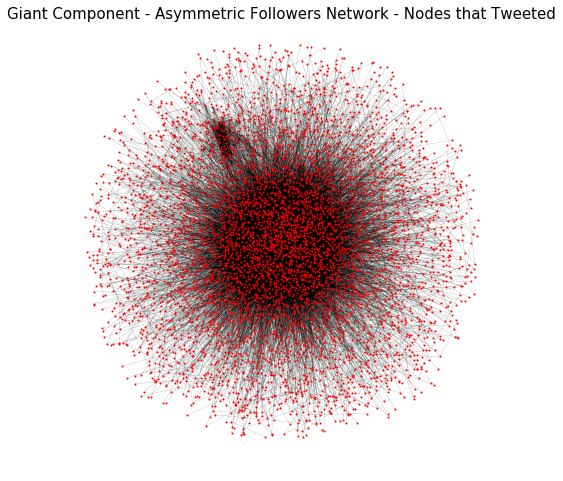

In [84]:
# draw graph
plt.figure(figsize=(6, 6))

# draw graph
nx.draw(G_filtered_giant, pos=pos_G_filtered_giant, node_size=1, width=0.1, with_labels=False)
plt.title("Giant Component - Asymmetric Followers Network - Nodes that Tweeted", size=15)

# save fig
plt.savefig("graphs/asymm_filtered_giant_comp.png")

In [85]:
## CHECK NUM FOLLOWERS VS NUM FOLLOWING CORRELATION

### Symmetric Graph

In [86]:
# filter only symmetric
sym_users_followers = filter_symmetric_from_dict(users_followers)
len(sym_users_followers)

736

In [87]:
# load Graph of followers
H_filtered = nx.from_dict_of_lists(sym_users_followers)
len(H_filtered.nodes)

736

In [88]:
# check if there are 0 degrees. Should be none
[v for k, v in dict(H_filtered.degree).items() if v ==0]

[]

#### Degree Distribution

Text(0.5,1,'Degree distribution')

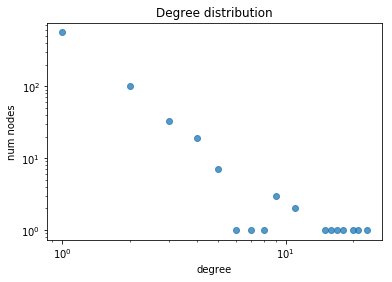

In [89]:
# degree distribution
degs = [v for k, v in H_filtered.degree]

# count
deg_count = Counter(degs)

x = np.array(list(deg_count.keys()))
inds = np.argsort(x)
x = x[inds]
y = np.array(list(deg_count.values()))
y = y[inds]

# plot
plt.loglog(x, y, 'o', alpha=0.75)

plt.xlabel("degree")
plt.ylabel("num nodes")
plt.title("Degree distribution")

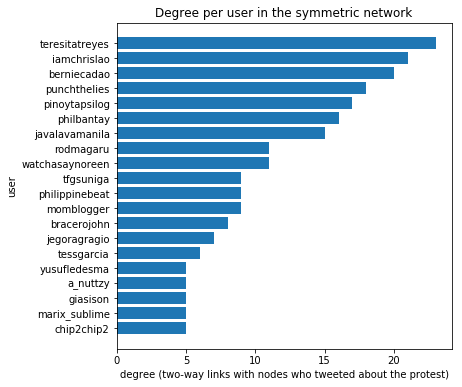

In [90]:
# top degrees in symmetric networks
ind = np.argsort([v for k, v in H_filtered.degree])
top_users = list(np.array([k for k, v in H_filtered.degree])[ind][::-1][:20])
top_users_dict = {u:k for u, k in H_filtered.degree if u in top_users}

# plot
plt.figure(figsize=(6, 6))

x = np.array(list(top_users_dict.keys()))
y = np.array(list(top_users_dict.values()))
inds = np.argsort(y)
x = x[inds]
y = y[inds]

plt.barh(sorted(x), sorted(y))
plt.yticks(range(len(x)), x)
plt.title("Degree per user in the symmetric network")
plt.xlabel("degree (two-way links with nodes who tweeted about the protest)")
plt.ylabel("user")
plt.show()

In [91]:
# Use spring layout
pos_H_filtered = nx.spring_layout(H_filtered)

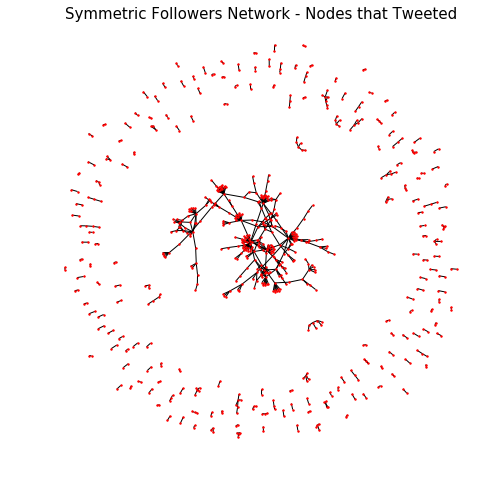

In [92]:
# draw graph
plt.figure(figsize=(6, 6))

# draw graph
nx.draw(H_filtered, pos=pos_H_filtered, node_size=2, with_labels=False,
        font_color='b', font_size=20)
plt.title("Symmetric Followers Network - Nodes that Tweeted", size=15)

# save fig
plt.savefig("graphs/symm_filtered.png")

In [93]:
# giant component only
H_filtered_giant = max(nx.connected_component_subgraphs(H_filtered), key=len)

In [94]:
# Use spring layout
n = len(H_filtered_giant.nodes)
pos_H_filtered_giant = nx.spring_layout(H_filtered_giant, k=1/np.sqrt(n))

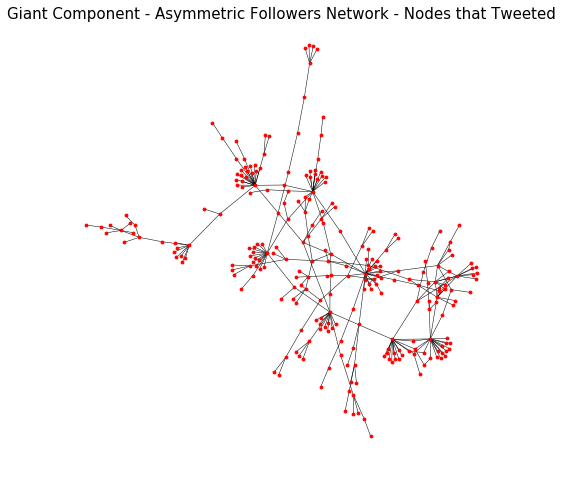

In [95]:
# draw graph
plt.figure(figsize=(6, 6))

# draw graph
nx.draw(H_filtered_giant, pos=pos_H_filtered_giant, node_size=8, width=0.5, with_labels=False)
plt.title("Giant Component - Asymmetric Followers Network - Nodes that Tweeted", size=15)

# save fig
plt.savefig("graphs/symm_filtered_giant_component.png")

## Recruitment Thresholds Distribution

### Overall Threshold Distribution - Asymmetric

In [96]:
def get_thresholds(following_counts, unique_users, following_dict):
    # input is a dictionary of {users : num of following}
    # input is unique users to select

    # initiate threshold dict
    thresh_dic = {}

    # Count the number of friends who activated at the time of activation, ka
    for user in list(following_counts.keys()):

        # check if user in user_screen_name in the dataset otherwise continue
        if user not in unique_users.user_screen_name.values:
            continue

        date_activated = unique_users[unique_users.user_screen_name == user].date

        # filter users whose date < date activated
        preactivated_users = unique_users[unique_users.date.values <
                                          date_activated.values]

        # filter only those being followed by user
        # DOUBLE CHECK THIS THIS SHOULDNT BE UNIFIED FOLLOWING
        _ = preactivated_users[preactivated_users.user_screen_name.isin(
            following_dict[user])]

        # get number of preactivated users that are being followed
        ka = len(_)

        # get number of people followed
        k = following_counts[user]

        if ka > k:
            print(ka, k)
            print(user)

        # if no connections, remove
        if k == 0:
            continue

        # get threshold
        thresh = ka / k

        # append to dictionary
        thresh_dic[user] = thresh

    return thresh_dic

In [193]:
# get following counts
following_counts = {k: len(v) for k, v in unified_following.items()}

# unique_users are unfiltered
unique_users = tweets.drop_duplicates(subset="user_screen_name", keep="first")

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, unified_following)

# display
len(thresholds)

6261

In [98]:
# mean threshold
np.mean([v for k, v in thresholds.items()])

0.023679685585552553

Text(0.5,1,'Distribution of $ka/k_{in}$')

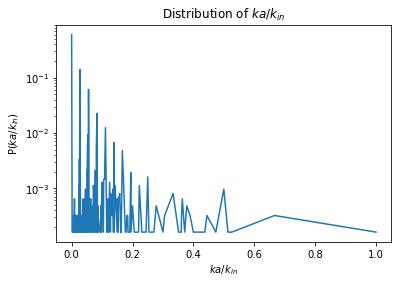

In [99]:
# plot distribution proportion of nodes vs ka/k
thresh = [v for k, v in thresholds.items()]
thresh_counts = Counter(thresh)
x = np.array(list(thresh_counts.keys()))
inds = np.argsort(x)
x_asym = x[inds]
y_asym = np.array(list(thresh_counts.values()))[inds]
y_asym = y_asym/np.sum(y_asym)
plt.semilogy(x_asym, y_asym)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

### Overall Threshold Distribution - Symmetric

In [100]:
# I THINK WE HAVE ALREADY COMPUTED THIS ABOVE
# Filter the network for symmetric only
# list of users and who they follow in symmetric network
symm_following = filter_symmetric_from_dict(unified_following)

# make graph
H = nx.from_dict_of_lists(symm_following, create_using=nx.DiGraph())

len(H.nodes)

38792

In [101]:
# get following counts
following_counts = {k: len(v) for k, v in symm_following.items()}

# unique_users are unfiltered. Symmetric
unique_users = unique_users

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, symm_following)

len(thresholds)

4422

In [102]:
# mean threshold
np.mean([v for k, v in thresholds.items()])

0.020797132631553642

Text(0.5,1,'Distribution of $ka/k_{in}$')

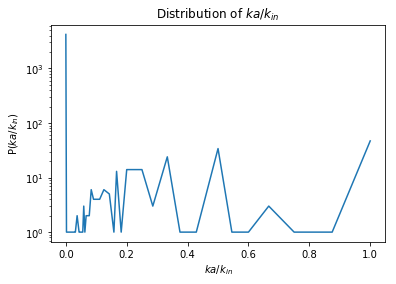

In [103]:
# plot distribution proportion of nodes vs ka/k
thresh = [v for k, v in thresholds.items()]
thresh_counts = Counter(thresh)
x = np.array(list(thresh_counts.keys()))
inds = np.argsort(x)
x_sym = x[inds]
y_sym = np.array(list(thresh_counts.values()))[inds]
plt.semilogy(x_sym, y_sym)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

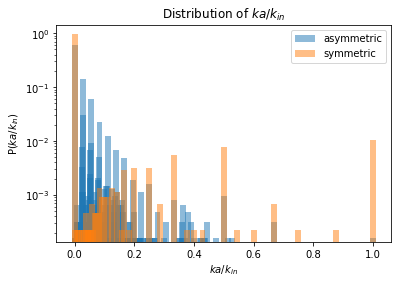

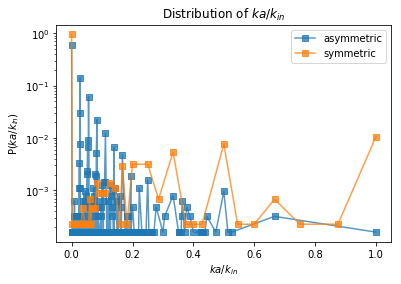

Text(0.5,1,'Distribution of $ka/k_{in}$')

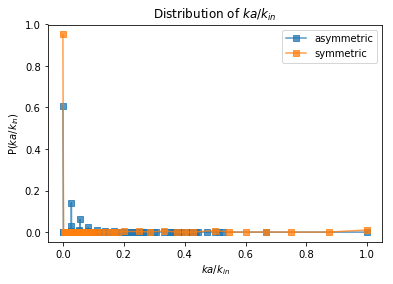

In [104]:
# CHANGE THIS TO PROPORTIONS

plt.semilogy(x_sym, y_sym/np.sum(y_sym), "-", alpha=0., ms=4)
plt.semilogy(x_asym, y_asym/np.sum(y_asym), "-", alpha=0., ms=4)

# f, ax = plt.subplots()
# ax.set(xscale="log", yscale="log")

plt.bar(x_asym, y_asym/np.sum(y_asym), label="asymmetric", width=0.02, alpha=0.5)
plt.bar(x_sym, y_sym/np.sum(y_sym), label="symmetric", width=0.02, alpha=0.5)

plt.legend()
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

plt.show()

plt.semilogy(x_asym, y_asym/np.sum(y_asym), 's-', label="asymmetric", alpha=0.75)
plt.semilogy(x_sym, y_sym/np.sum(y_sym), 's-', label="symmetric", alpha=0.75)

plt.legend()
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

plt.show()

plt.plot(x_asym, y_asym/np.sum(y_asym), 's-', label="asymmetric", alpha=0.75)
plt.plot(x_sym, y_sym/np.sum(y_sym), 's-', label="symmetric", alpha=0.75)

plt.legend()
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

Assuming that retaining the symmetric network is like removing ifluencers and media (with huge number of followers but few users followed), or retaining groups of friends in the network, the threshold distribution shifts to higher threshold values. It might be that people in the symmetric subgraph needed more pressure to join the protest / be recruited. Media and influencers could have played a role in activating a significant portion of the users (lower required ka/k)

### Network Activation Over Time - Visualized

In [294]:
# recompute unique_users to be sure
unique_users = tweets.drop_duplicates(subset="user_screen_name", keep="first")

In [295]:
# get dates
dates = list(unique_users.drop_duplicates(subset="date").date.values)

len(dates), len(unique_users)

(103, 6424)

#### Asymmetric - Full network

In [296]:
def save_animation_imgs(G_anim, pos, dates, name="graph", time_delta=1):
    nodes = G_anim.nodes
    
    # make a for loop of coloring nodes for each date
    # everything including isolates
    date = dates[0]
    end_date = dates[-1]
    delta = timedelta(days=time_delta)

    while date <= end_date:

        # filter users (nodes) based on date
        filtered_users = list(unique_users[unique_users.date <=
                                           date].user_screen_name.values)

        date += delta

        filtered_nodes = [node for node in nodes if node in filtered_users]

        # make a node_list of other users not selected
        other_users = [node for node in nodes if node not in filtered_nodes]

        # make variable node sizes
        node_sizes = []
        for node in nodes:
            if node in filtered_nodes:
                node_sizes.append(10)
            else:
                node_sizes.append(0.1)

        # draw graph
        plt.figure(figsize=(6, 6))

        # draw graph selected
        plt.title(date)
        nx.draw(G_anim, pos=pos, node_size=node_sizes, width=0.3,  with_labels=False)

        # save graph
        plt.savefig(f"images/{name}_{str(date)}.png");
    

In [208]:
# # animate G_filtered
# save_animation_imgs(G_anim=G_filtered_giant, pos=pos_G_filtered_giant, dates=dates, name="G_filtered_giant", time_delta=1)


In [298]:
# # animate H_everyone
# save_animation_imgs(G_anim=H_everyone, pos=pos_H_everyone, dates=dates, name="H_everyone", time_delta=1)


In [300]:
# # animate H_everyone_giant
# save_animation_imgs(G_anim=H_everyone_giant, pos=pos_H_everyone_giant, dates=dates, name="H_everyone_giant", time_delta=1)


### Distribution of Low, Med, and High Threshold Users Over Time

#### Asymmetric

In [201]:
# ASYMMETRIC
# get following counts
following_counts = {k: len(v) for k, v in unified_following.items()}

# unique_users are unfiltered. Symmetric
unique_users = tweets.drop_duplicates(subset="user_screen_name", keep="first")

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, unified_following)

# display
len(thresholds)

6261

In [202]:
# get the date
unique_users_date = unique_users.loc[:, ["user_screen_name", "date"]]
unique_users_date.head()

user_screen_name        date
0        jeninajoy  2013-07-15
1         faygumba  2013-07-15
2       momblogger  2013-07-15
3      cblaguardia  2013-07-15
4     ebolutionate  2013-07-15

In [203]:
# get a dataframe of threshold values
df_thresh = pd.DataFrame.from_dict(thresholds, orient="index").reset_index()
df_thresh.columns = ["user_screen_name", "threshold"]
df_thresh.head()

user_screen_name  threshold
0        ancalerts   0.012837
1      berniecadao   0.066869
2      sherylcayco   0.031579
3   irneyespiritu1   0.066667
4         tunogopm   0.000000

In [204]:
# combine user_screen_name, date, and thresholds
df_thresh_date = pd.merge(unique_users_date, df_thresh,
         left_on="user_screen_name", right_on="user_screen_name")
df_thresh_date.head()

user_screen_name        date  threshold
0        jeninajoy  2013-07-15        0.0
1         faygumba  2013-07-15        0.0
2       momblogger  2013-07-15        0.0
3      cblaguardia  2013-07-15        0.0
4     ebolutionate  2013-07-15        0.0

In [205]:
# max thresholds
low = 0.05
med = 0.1

# filter thresholds of users (low thresholds)
low_thresh = df_thresh_date[df_thresh_date.threshold <= low].reset_index(
    drop=True)

# get counts per date only (distribution)
low_thresh = low_thresh.groupby("date").count().reset_index()

# filter thresholds of users (med thresholds)
med_thresh = df_thresh_date[np.logical_and(
    low < df_thresh_date.threshold, df_thresh_date.threshold <= med)].reset_index(drop=True)

# get counts per date only (distribution)
med_thresh = med_thresh.groupby("date").count().reset_index()

# filter thresholds of users (high thresholds)
high_thresh = df_thresh_date[med < df_thresh_date.threshold].reset_index(
    drop=True)

# get counts per date only (distribution)
high_thresh = high_thresh.groupby("date").count().reset_index()

In [206]:
# size of each threshold category
np.sum(low_thresh.threshold), np.sum(med_thresh.threshold), np.sum(high_thresh.threshold)

(5148, 771, 342)

Text(0.5,1,'Proportion of users who activated over time for three threshold categories')

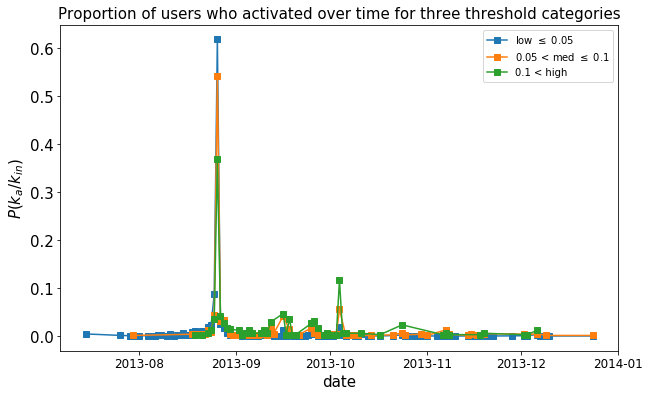

In [223]:
# plot proportions (RIGHT NOW THRESHOLDS ARE PLOTTED)

plt.figure(figsize=(10, 6))

x = low_thresh.date
y = low_thresh.threshold / np.sum(low_thresh.threshold)
plt.plot(x, y, 's-', label=f"low $\leq$ {low}")

x = med_thresh.date
y = med_thresh.threshold / np.sum(med_thresh.threshold)
plt.plot(x, y, 's-', label=f"{low } < med $\leq$ {med}")

x = high_thresh.date
y = high_thresh.threshold / np.sum(high_thresh.threshold)
plt.plot(x, y, 's-', label=f"{med} < high")
plt.xticks(size=12)
plt.yticks(size=15)
plt.legend()

plt.xlabel("date", size=15)
plt.ylabel("$P(k_a/k_{in})$", size=15)
plt.title("Proportion of users who activated over time for three threshold categories", size=15)

#### Symmetric

In [115]:
# SYMMETRIC
# get following counts
following_counts = {k: len(v) for k, v in symm_following.items()}

# unique_users are unfiltered. Symmetric
unique_users = tweets.drop_duplicates(subset="user_screen_name", keep="first")

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, symm_following)

# display
len(thresholds)

4422

In [116]:
# get the date
unique_users_date = unique_users.loc[:, ["user_screen_name", "date"]]
unique_users_date.head()

user_screen_name        date
0        jeninajoy  2013-07-15
1         faygumba  2013-07-15
2       momblogger  2013-07-15
3      cblaguardia  2013-07-15
4     ebolutionate  2013-07-15

In [117]:
# get a dataframe of threshold values
df_thresh = pd.DataFrame.from_dict(thresholds, orient="index").reset_index()
df_thresh.columns = ["user_screen_name", "threshold"]
df_thresh.head()

user_screen_name  threshold
0        ancalerts   0.000000
1      berniecadao   0.044693
2      sherylcayco   0.000000
3   irneyespiritu1   0.000000
4         tunogopm   0.000000

In [118]:
# combine user_screen_name, date, and thresholds
df_thresh_date = pd.merge(unique_users_date, df_thresh,
         left_on="user_screen_name", right_on="user_screen_name")
df_thresh_date.head()

user_screen_name        date  threshold
0        jeninajoy  2013-07-15        0.0
1         faygumba  2013-07-15        0.0
2       momblogger  2013-07-15        0.0
3      cblaguardia  2013-07-15        0.0
4     ebolutionate  2013-07-15        0.0

In [119]:
# max thresholds
low = low
med = med

# filter thresholds of users (low thresholds)
low_thresh = df_thresh_date[df_thresh_date.threshold <= low].reset_index(
    drop=True)

# get counts per date only (distribution)
low_thresh = low_thresh.groupby("date").count().reset_index()

# filter thresholds of users (med thresholds)
med_thresh = df_thresh_date[np.logical_and(
    low < df_thresh_date.threshold, df_thresh_date.threshold <= med)].reset_index(drop=True)

# get counts per date only (distribution)
med_thresh = med_thresh.groupby("date").count().reset_index()

# filter thresholds of users (high thresholds)
high_thresh = df_thresh_date[med < df_thresh_date.threshold].reset_index(
    drop=True)

# get counts per date only (distribution)
high_thresh = high_thresh.groupby("date").count().reset_index()

In [120]:
# size of each threshold category
np.sum(low_thresh.threshold), np.sum(med_thresh.threshold), np.sum(high_thresh.threshold)

(4220, 26, 176)

Text(0.5,1,'Proportion of users who activated over time for three threshold categories')

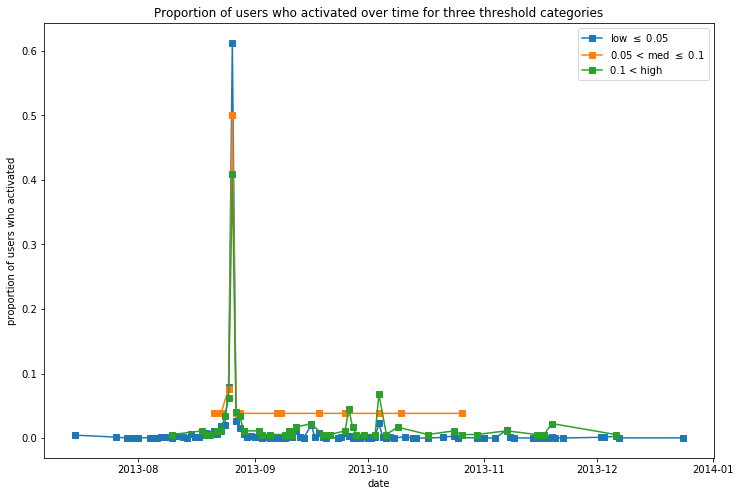

In [121]:
# plot proportions (RIGHT NOW THRESHOLDS ARE PLOTTED)

plt.figure(figsize=(12, 8))

x = low_thresh.date
y = low_thresh.threshold / np.sum(low_thresh.threshold)
plt.plot(x, y, 's-', label=f"low $\leq$ {low}")

x = med_thresh.date
y = med_thresh.threshold / np.sum(med_thresh.threshold)
plt.plot(x, y, 's-', label=f"{low } < med $\leq$ {med}")

x = high_thresh.date
y = high_thresh.threshold / np.sum(high_thresh.threshold)
plt.plot(x, y, 's-', label=f"{med} < high")
plt.legend()

plt.xlabel("date")
plt.ylabel("proportion of users who activated")
plt.title("Proportion of users who activated over time for three threshold categories")

### Threshold Distribution Before and After Protest

#### Asymmetric

In [122]:
# threshold before protest
tweets_before = tweets_0[tweets_0.date < datetime(2013, 8, 26)].reset_index(drop=True)
len(tweets_before)

1841

In [123]:
# get following counts
# asymmetric
following_counts = {k: len(v) for k, v in unified_following.items()}

# unique_users are unfiltered. Symmetric
unique_users = tweets_before.drop_duplicates(subset="user_screen_name", keep="first")

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, unified_following)

# display
len(thresholds)

1165

In [124]:
# mean threshold
np.mean([v for k, v in thresholds.items()])

0.014815652479091597

Text(0.5,1,'Distribution of $ka/k_{in}$')

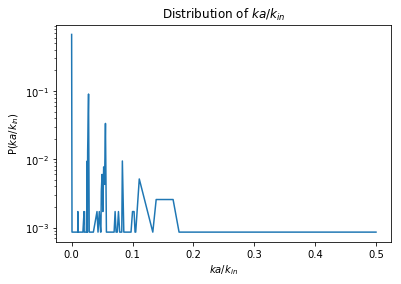

In [125]:
# plot distribution proportion of nodes vs ka/k
# proportion of nodes that activated before protest
thresh = [v for k, v in thresholds.items()]
thresh_counts = Counter(thresh)
x = np.array(list(thresh_counts.keys()))
inds = np.argsort(x)
x_asym_before = x[inds]
y_asym_before = np.array(list(thresh_counts.values()))[inds]
y_asym_before = y_asym_before/np.sum(y_asym_before)
plt.semilogy(x_asym_before, y_asym_before)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

In [126]:
# threshold after protest
tweets_after = tweets_0[tweets_0.date >= datetime(2013, 8, 26)].reset_index(drop=True)
len(tweets_after)

9541

In [127]:
# get following counts
# asymmetric
following_counts = {k: len(v) for k, v in unified_following.items()}

# unique_users are unfiltered. Symmetric
unique_users = tweets_after.drop_duplicates(subset="user_screen_name", keep="first")

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, unified_following)

# display
len(thresholds)

5489

In [128]:
# mean threshold
np.mean([v for k, v in thresholds.items()])

0.02901144449607086

Text(0.5,1,'Distribution of $ka/k_{in}$')

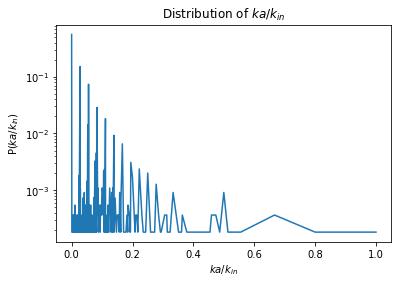

In [129]:
# plot distribution proportion of nodes vs ka/k
thresh = [v for k, v in thresholds.items()]
thresh_counts = Counter(thresh)
x = np.array(list(thresh_counts.keys()))
inds = np.argsort(x)
x_asym_after = x[inds]
y_asym_after = np.array(list(thresh_counts.values()))[inds]
y_asym_after = y_asym_after/np.sum(y_asym_after)
plt.semilogy(x_asym_after, y_asym_after)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

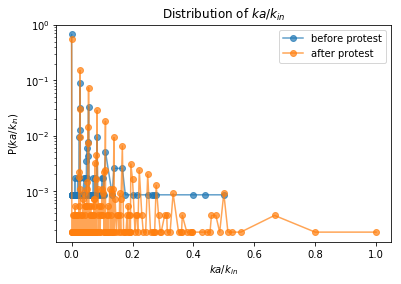

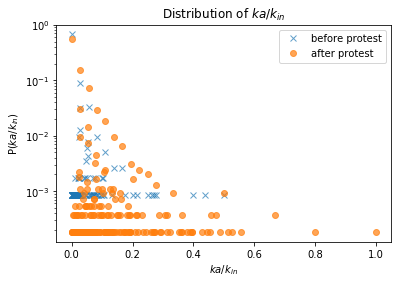

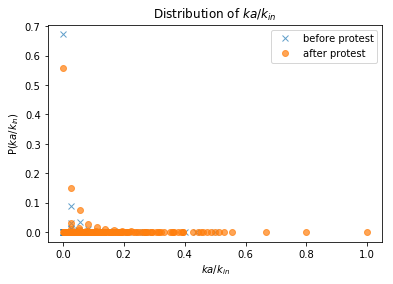

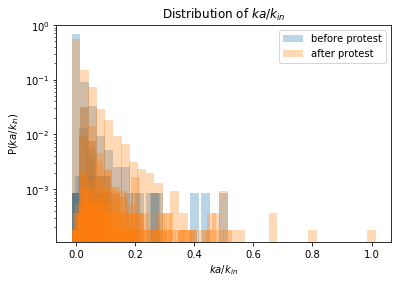

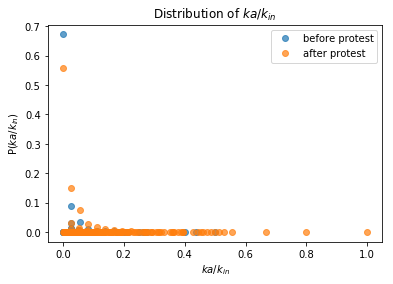

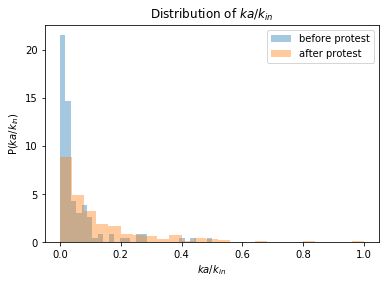

In [130]:
plt.semilogy(x_asym_before, y_asym_before, 'o-', alpha=0.7, label="before protest")
plt.semilogy(x_asym_after, y_asym_after,'o-', alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.semilogy(x_asym_before, y_asym_before, 'x', alpha=0.7, label="before protest")
plt.semilogy(x_asym_after, y_asym_after,'o', alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.plot(x_asym_before, y_asym_before, 'x', alpha=0.7, label="before protest")
plt.plot(x_asym_after, y_asym_after,'o', alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.semilogy(x_asym_after, y_asym_after, alpha=0.)
plt.bar(x_asym_before, y_asym_before, alpha=0.3, width=0.03, label="before protest")
plt.bar(x_asym_after, y_asym_after, alpha=0.3, width=0.03, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.plot(x_asym_before, y_asym_before, "o", alpha=0.7, label="before protest")
plt.plot(x_asym_after, y_asym_after, "o", alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

sns.distplot(x_asym_before, label="before protest", kde=False, norm_hist=True, hist=True,)
sns.distplot(x_asym_after, label="after protest", kde=False, norm_hist=True, hist=True,)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()

#### Symmetric

In [131]:
# threshold before protest
tweets_before = tweets_before

In [132]:
# get following counts
# symmetric
following_counts = {k: len(v) for k, v in symm_following.items()}

# unique_users are unfiltered. Symmetric
unique_users = tweets_before.drop_duplicates(subset="user_screen_name", keep="first")

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, symm_following)

# display
len(thresholds)

824

In [133]:
# mean threshold
np.mean([v for k, v in thresholds.items()])

0.025837870266642412

Text(0.5,1,'Distribution of $ka/k_{in}$')

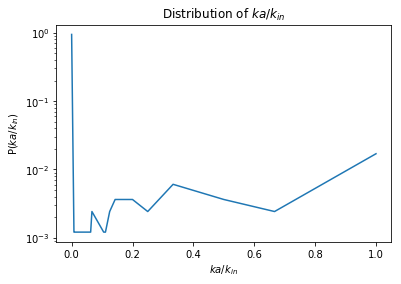

In [134]:
# plot distribution proportion of nodes vs ka/k
# proportion of nodes that activated before protest
thresh = [v for k, v in thresholds.items()]
thresh_counts = Counter(thresh)
x = np.array(list(thresh_counts.keys()))
inds = np.argsort(x)
x_sym_before = x[inds]
y_sym_before = np.array(list(thresh_counts.values()))[inds]
y_sym_before = y_sym_before/np.sum(y_sym_before)
plt.semilogy(x_sym_before, y_sym_before)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

In [135]:
# threshold after protest
tweets_after = tweets_0[tweets_0.date >= datetime(2013, 8, 26)].reset_index(drop=True)
len(tweets_after)

9541

In [136]:
# get following counts
# symmetric
following_counts = {k: len(v) for k, v in symm_following.items()}

# unique_users are unfiltered. Symmetric
unique_users = tweets_after.drop_duplicates(subset="user_screen_name", keep="first")

# show some threshold values
thresholds = get_thresholds(following_counts, unique_users, symm_following)

# display
len(thresholds)

3874

In [137]:
# mean threshold
np.mean([v for k, v in thresholds.items()])

0.021041427528950683

Text(0.5,1,'Distribution of $ka/k_{in}$')

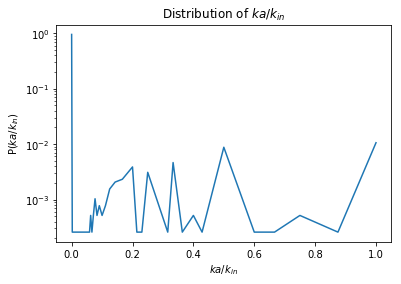

In [138]:
# plot distribution proportion of nodes vs ka/k
thresh = [v for k, v in thresholds.items()]
thresh_counts = Counter(thresh)
x = np.array(list(thresh_counts.keys()))
inds = np.argsort(x)
x_sym_after = x[inds]
y_sym_after = np.array(list(thresh_counts.values()))[inds]
y_sym_after = y_sym_after/np.sum(y_sym_after)
plt.semilogy(x_sym_after, y_sym_after)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")

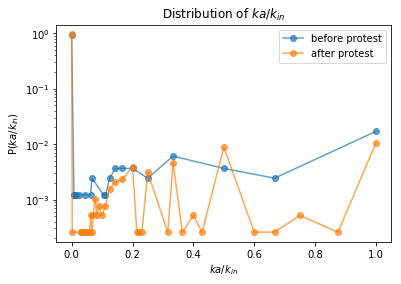

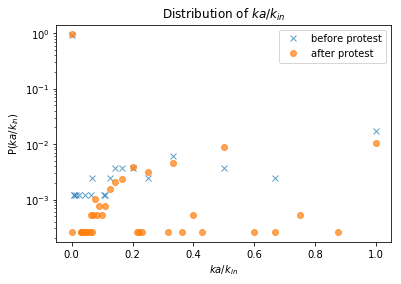

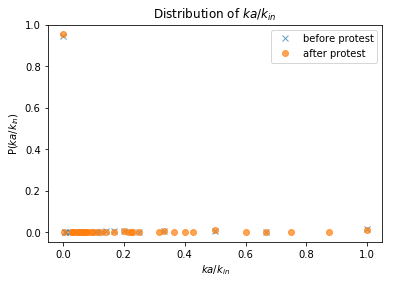

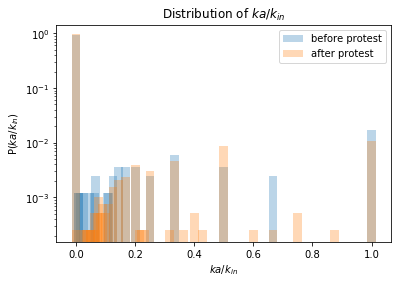

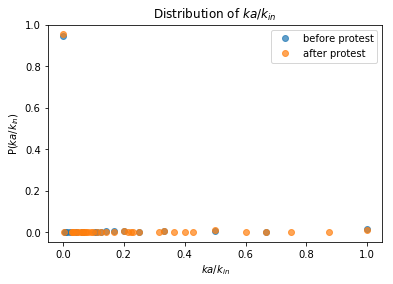

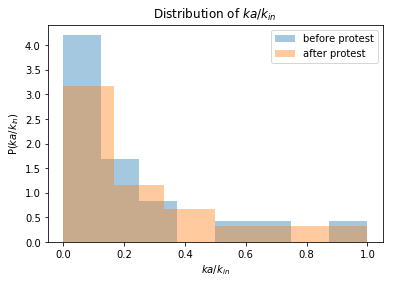

In [139]:
plt.semilogy(x_sym_before, y_sym_before, 'o-', alpha=0.7, label="before protest")
plt.semilogy(x_sym_after, y_sym_after,'o-', alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.semilogy(x_sym_before, y_sym_before, 'x', alpha=0.7, label="before protest")
plt.semilogy(x_sym_after, y_sym_after,'o', alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.plot(x_sym_before, y_sym_before, 'x', alpha=0.7, label="before protest")
plt.plot(x_sym_after, y_sym_after,'o', alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.semilogy(x_sym_after, y_sym_after, alpha=0.)
plt.bar(x_sym_before, y_sym_before, alpha=0.3, width=0.03, label="before protest")
plt.bar(x_sym_after, y_sym_after, alpha=0.3, width=0.03, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

plt.plot(x_sym_before, y_sym_before, "o", alpha=0.7, label="before protest")
plt.plot(x_sym_after, y_sym_after, "o", alpha=0.7, label="after protest")
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()
plt.show()

sns.distplot(x_sym_before, label="before protest", kde=False, norm_hist=True, hist=True,)
sns.distplot(x_sym_after, label="after protest", kde=False, norm_hist=True, hist=True,)
plt.xlabel("$ka/k_{in}$")
plt.ylabel("P($ka/k_{in}$)")
plt.title("Distribution of $ka/k_{in}$")
plt.legend()

## Recruitment Bursts

In [ ]:
## OPTIONAL

## Distribution of Cascade Size

In [140]:
# How to identify cascade? retweet of same message?
    # Count how many retweeted same message = cascade size?
    # Count how many used the same #hashtag - cascade size?
    # Add k core attributes per node
    # Find K core of who started = seed/leader
    # Associate cascade size with k core of seed/leader

In [141]:
# count retweets and replies for each parent id
cascade_sizes = tweets_0.groupby(
    by="parent_tweet_id").count().reset_index().iloc[:, :2].date.values

# Should we add this?
# # we add the original tweet
# cascade_sizes = cascade_sizes + 1

(array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
 <a list of 7 Text yticklabel objects>)

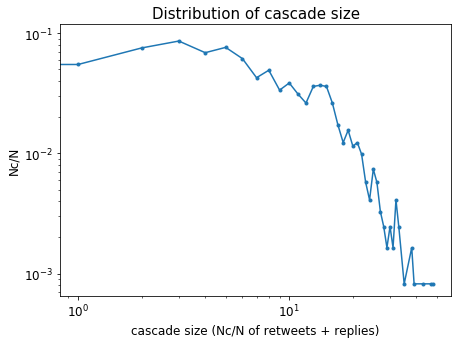

In [263]:
x = np.array(list(Counter(cascade_sizes).keys()))
inds = np.argsort(x)
x = x[inds]
y = np.array(list(Counter(cascade_sizes).values()))[inds]
y = y / np.sum(y)

plt.figure(figsize=(7, 5))
plt.loglog(x, y, marker=".", )
plt.xlabel("cascade size (Nc/N of retweets + replies)", size=12)
plt.ylabel("Nc/N", size=12)
plt.title("Distribution of cascade size", size=15)
plt.xticks(size=12)
plt.yticks(size=12)

## Cascade Size

Here, the nodes considered are only those who tweeted /retweeted/replied about the protest

### Asymmetric Network

#### Cascade Size vs K-Core

In [242]:
# make a dictionary of parent tweet_id and cascade size
# Check in the asymmetric network and symmetric network
# will associate parent_tweet_id with original tweeter and calculate k core

cascade_df = tweets_0.groupby(
    by="parent_tweet_id").count().reset_index().iloc[:, :2]
# rename column to cascade
cascade_df = cascade_df.rename(columns={"date": "cascade"})
cascade_df.head()

parent_tweet_id  cascade
0     7.803567e+09        0
1     1.764288e+10        0
2     2.760823e+17        0
3     3.566097e+17        7
4     3.566177e+17        2

In [243]:
# k cores in asymmetric network

# nodes of only those who tweeted
# G = nx.from_dict_of_lists(users_followers, create_using=nx.DiGraph())

# users who tweeted and followers who may or may not have tweeted
# this makes sense as this captures more the k-core (which doesn't depend on tweets)
G = nx.from_dict_of_lists(users_followers_everyone, create_using=nx.DiGraph())

len(G.nodes)

305537

In [244]:
# remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

In [245]:
len(G.nodes)

305537

In [246]:
# k cores in asymmetric network - includes those who did not tweet about the protest
# {name: k_core, name: k_core}
k_cores_dict = nx.core_number(G)
len(k_cores_dict)

305537

Text(0.5,1,'kcore distribution')

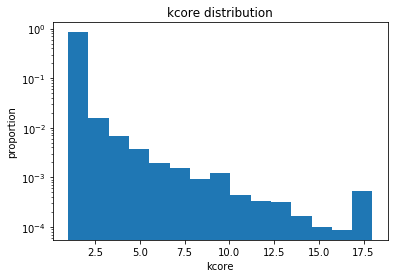

In [247]:
# core distribution
plt.semilogy();
plt.hist(list(k_cores_dict.values()), normed=True, bins=15);
plt.xlabel("kcore")
plt.ylabel("proportion")
plt.title("kcore distribution")

In [248]:
# k_core per users
k_core_df = pd.DataFrame.from_dict(
    k_cores_dict, orient='index').reset_index()
k_core_df.columns = ["user_screen_name", "kcore"]
len(k_core_df)

305537

In [249]:
k_core_df.head()

user_screen_name  kcore
0        jeninajoy     10
1         faygumba      8
2       momblogger     18
3      cblaguardia     10
4     ebolutionate      1

In [250]:
# get the parent user screen name
cascade_df_2 = pd.merge(unique_users, cascade_df, left_on="tweet_id",
                        right_on="parent_tweet_id").loc[:, ["user_screen_name", "cascade"]]
cascade_df_2.head()

user_screen_name  cascade
0        jeninajoy        7
1       momblogger        2
2     bethangsioco        6
3        papoyvega        1
4   familyfirstmom        1

In [251]:
# merge cascade size and kcore
df_cascade_kcore = pd.merge(k_core_df, cascade_df_2, left_on="user_screen_name",
         right_on="user_screen_name")[["kcore", "cascade"]]
df_cascade_kcore.head()

kcore  cascade
0     10        7
1     18        2
2     15        6
3      2        1
4      2        1

In [252]:
len(df_cascade_kcore)

412

Text(0,0.5,'$N_c$')

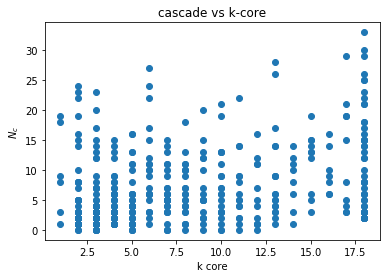

In [253]:
x = df_cascade_kcore["kcore"]
inds = np.argsort(x)
x = x[inds]
y = df_cascade_kcore["cascade"][inds]

plt.plot(x, y, 'o')
plt.title("cascade vs k-core")
plt.xlabel("k core")
plt.ylabel("$N_c$")

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Text yticklabel objects>)

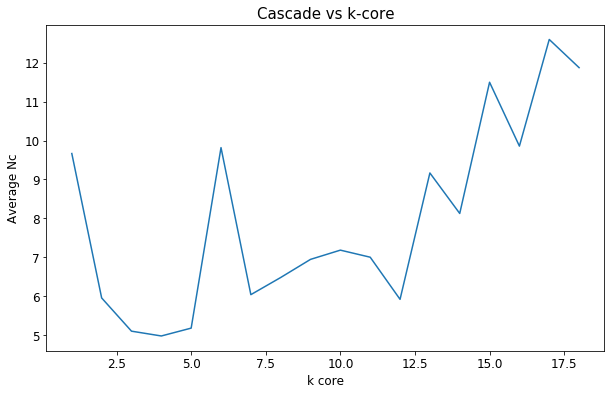

In [255]:
# average cascade size vs k core
cascade_kcore_mean = df_cascade_kcore.groupby(by="kcore").mean().reset_index()

x = cascade_kcore_mean["kcore"]
inds = np.argsort(x)
x = x[inds]
y = cascade_kcore_mean["cascade"][inds]

plt.figure(figsize=(10, 6))
plt.plot(x, y, '-')
plt.title("Cascade vs k-core", size=15)
plt.xlabel("k core", size=12)
plt.ylabel("Average Nc", size=12)
plt.xticks(size=12)
plt.yticks(size=12)

Text(0.5,1,'users with highest k cores for asymmetric network')

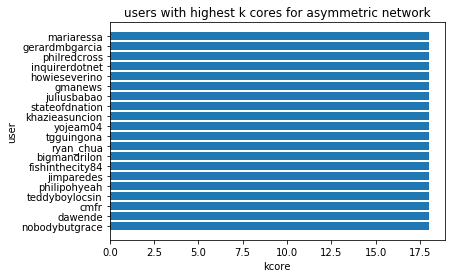

In [156]:
# users in highest k core
# CHECK THISSSS
_ = k_core_df.sort_values(by="kcore", ascending=False)
x = np.array(_.user_screen_name.values)[:20]
y = np.array(_.kcore.values)[:20]
inds = np.argsort(y)
x = x[inds]
y = y[inds]
plt.barh(sorted(x), y)
plt.yticks(range(len(x)), x)
plt.xlabel("kcore")
plt.ylabel("user")
plt.title("users with highest k cores for asymmetric network")

The average cascade size correlates positively with k core size. This may mean that tweets from users in higher k cores reach more people than users in lower k cores.

#### Cascade Size vs Out-Degree

In [180]:
# correlate with cascade size with out_degrees
# degree per users
degrees = dict(G.out_degree)

degree_df = pd.DataFrame.from_dict(
    degrees, orient='index').reset_index()

# rename columns
degree_df.columns = ["user_screen_name", "degree"]

In [181]:
# merge cascade size and degree
df_degree_cascade = pd.merge(degree_df, cascade_df_2, left_on="user_screen_name",
         right_on="user_screen_name")[["degree", "cascade"]]
df_degree_cascade.head()

degree  cascade
0      71        5
1      24        0
2      62        5
3      90       10
4      37        4

Text(0,0.5,'cascade size')

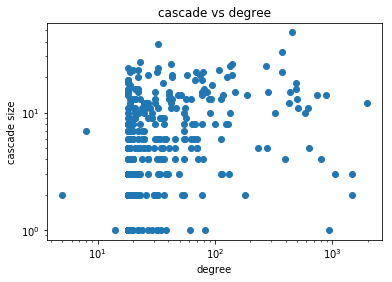

In [182]:
# degree vs k core

x = df_degree_cascade["degree"]
inds = np.argsort(x)
x = x[inds]
y = df_degree_cascade["cascade"][inds]

plt.loglog(x, y, 'o')
plt.title("cascade vs degree")
plt.xlabel("degree")
plt.ylabel("cascade size")

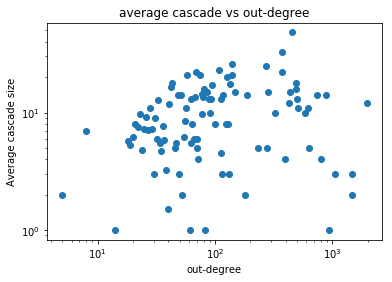

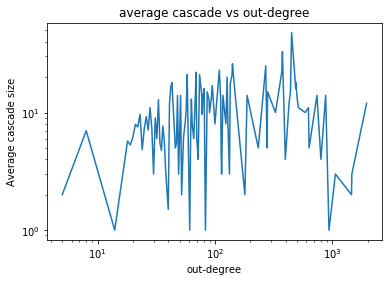

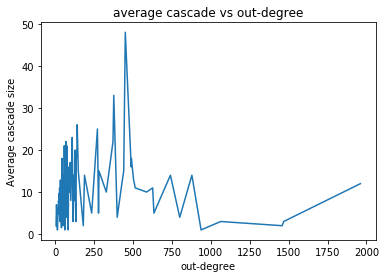

In [184]:
# mean degree vs k core
df_degree_cascade_mean = df_degree_cascade.groupby(by="degree").mean().reset_index()

x = df_degree_cascade_mean["degree"]
inds = np.argsort(x)
x = x[inds]
y = df_degree_cascade_mean["cascade"][inds]

f, ax = plt.subplots()
# ax.set(xscale="log", yscale="log")

# sns.lmplot("degree", "cascade", data=df_degree_k_core_mean)
plt.loglog(x, y, 'o')
plt.title("average cascade vs out-degree")
plt.xlabel("out-degree")
plt.ylabel("Average cascade size")

plt.show()

plt.loglog(x, y, '-')
plt.title("average cascade vs out-degree")
plt.xlabel("out-degree")
plt.ylabel("Average cascade size")

plt.show()

plt.plot(x, y, '-')
plt.title("average cascade vs out-degree")
plt.xlabel("out-degree")
plt.ylabel("Average cascade size")

plt.show()

### Symmetric Network

#### Cascade Size vs K-Core

In [161]:
# k cores in symmetric network
# from H - including followers who may or may have not tweeted
# to fully capture the k-core aspect
H = nx.from_dict_of_lists(sym_users_followers_everyone)
len(H.nodes)

736

In [162]:
# remove self-loops
H.remove_edges_from(nx.selfloop_edges(H))

In [163]:
len(H.nodes)

736

In [164]:
# k cores in asymmetric network - includes those who did not tweet about the protest
# {name: k_core, name: k_core}
k_cores_dict = nx.core_number(H)

# SAVE KCORE AS ATTRIBUTE OF NODE
len(k_cores_dict)

736

Text(0.5,1,'kcore distribution')

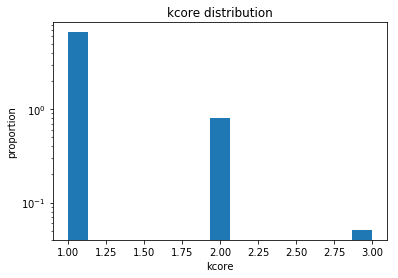

In [165]:
# core distribution
plt.semilogy();
plt.hist(list(k_cores_dict.values()), normed=True, bins=15);
plt.xlabel("kcore")
plt.ylabel("proportion")
plt.title("kcore distribution")

In [166]:
# k_core per users
k_core_df = pd.DataFrame.from_dict(
    k_cores_dict, orient='index').reset_index()
k_core_df.columns = ["user_screen_name", "kcore"]
len(k_core_df)

736

In [167]:
k_core_df.head()

user_screen_name  kcore
0        jeninajoy      1
1       momblogger      3
2     bethangsioco      1
3      mrsunlawyer      1
4      noypiaquino      2

In [168]:
# get the parent user screen name
cascade_df_2 = pd.merge(unique_users, cascade_df, left_on="tweet_id",
                        right_on="parent_tweet_id").loc[:, ["user_screen_name", "cascade"]]
cascade_df_2.head()

user_screen_name  cascade
0   inquirerdotnet        4
1   charisgalaraga        8
2   philippinebeat       26
3   patevangelista       16
4        ancalerts       12

In [169]:
# merge cascade size and kcore
df_cascade_kcore = pd.merge(k_core_df, cascade_df_2, left_on="user_screen_name",
         right_on="user_screen_name")[["kcore", "cascade"]]
df_cascade_kcore.head()

kcore  cascade
0      3        5
1      1        0
2      1        5
3      1        1
4      3       26

In [170]:
len(df_cascade_kcore)

58

Text(0,0.5,'$N_c$/$N$')

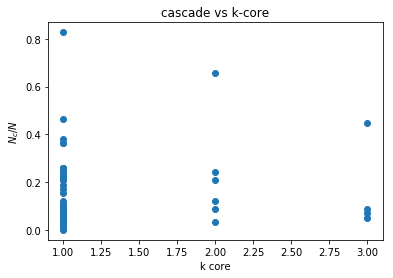

In [171]:
x = df_cascade_kcore["kcore"]
inds = np.argsort(x)
x = x[inds]
y = df_cascade_kcore["cascade"][inds]

plt.plot(x, y/len(y), 'o')
plt.title("cascade vs k-core")
plt.xlabel("k core")
plt.ylabel("$N_c$/$N$")

Text(0,0.5,'Average cascade size')

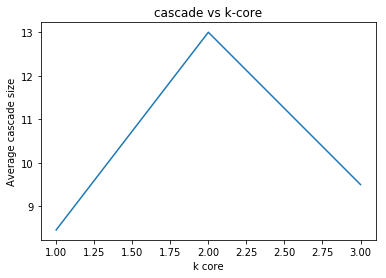

In [172]:
# average cascade size vs k core
cascade_kcore_mean = df_cascade_kcore.groupby(by="kcore").mean().reset_index()

x = cascade_kcore_mean["kcore"]
inds = np.argsort(x)
x = x[inds]
y = cascade_kcore_mean["cascade"][inds]

plt.plot(x, y, '-')
plt.title("cascade vs k-core")
plt.xlabel("k core")
plt.ylabel("Average cascade size")

Text(0.5,1,'users with highest k cores for symmetric network')

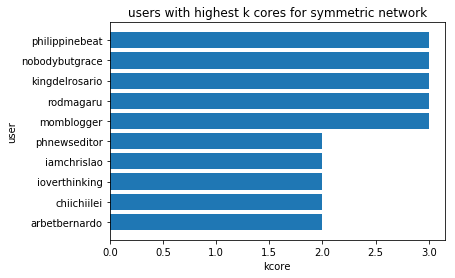

In [173]:
# users in highest k core
_ = k_core_df.sort_values(by="kcore",ascending=False)
x = np.array(_.user_screen_name.values)[:10]
y = np.array(_.kcore.values)[:10]
inds = np.argsort(y)
x = x[inds]
y = y[inds]
plt.barh(sorted(x), y)
plt.yticks(range(len(x)), x)
plt.xlabel("kcore")
plt.ylabel("user")
plt.title("users with highest k cores for symmetric network")

#### Cascade Size vs Degree

In [174]:
# correlate with kcore with degrees
# degree per users
degrees = dict(H.degree)

degree_df = pd.DataFrame.from_dict(
    degrees, orient='index').reset_index()

# rename columns
degree_df.columns = ["user_screen_name", "degree"]

In [175]:
# merge cascade size and kcore
df_degree_cascade = pd.merge(degree_df, cascade_df_2, left_on="user_screen_name",
         right_on="user_screen_name")[["degree", "cascade"]]
df_degree_cascade.head()

degree  cascade
0       9        5
1       1        0
2       1        5
3       4        1
4       9       26

In [176]:
len(df_degree_cascade)

58

Text(0,0.5,'cascade size')

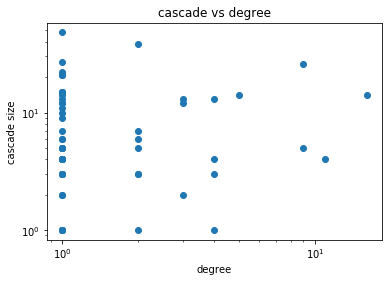

In [177]:
# degree vs k core

x = df_degree_cascade["degree"]
inds = np.argsort(x)
x = x[inds]
y = df_degree_cascade["cascade"][inds]

plt.loglog(x, y, 'o')
plt.title("cascade vs degree")
plt.xlabel("degree")
plt.ylabel("cascade size")

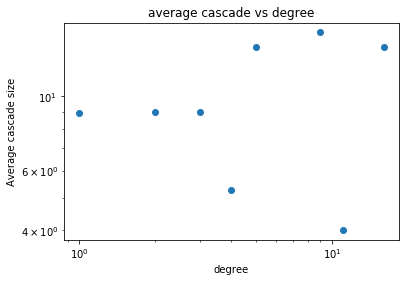

Text(0,0.5,'Average cascade size')

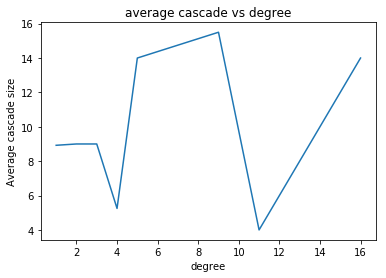

In [178]:
# mean degree vs k core
df_degree_cascade_mean = df_degree_cascade.groupby(by="degree").mean().reset_index()

x = df_degree_cascade_mean["degree"]
inds = np.argsort(x)
x = x[inds]
y = df_degree_cascade_mean["cascade"][inds]

f, ax = plt.subplots()
# ax.set(xscale="log", yscale="log")

# sns.lmplot("degree", "cascade", data=df_degree_k_core_mean)
plt.loglog(x, y, 'o')
plt.title("average cascade vs degree")
plt.xlabel("degree")
plt.ylabel("Average cascade size")

plt.show()

plt.plot(x, y, '-')
plt.title("average cascade vs degree")
plt.xlabel("degree")
plt.ylabel("Average cascade size")